## Proyecto Analisis de escalabilidad TSP

Integrantes:
- Robert Buleje
- Giancarlo Poemape
- Diana Sanchez

### Observación: 
- Los experimentos han sido corrido en el cluster khipu.
- Con respecto al incremento del dataset lo hemos multiplicado.
- Para los experimentos no se esta usando la semilla al correr el modelo (random seed), para evitar obtener resultados iguales en cada iteración  

In [1]:
%pip install --q pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df_full = pd.read_csv('results_khipu.csv', sep=',')
df_full

,p,n,total_time,comp_time,comm_time,overhead,cost
0,2,4,0.0012,0.0003,0.0002,0.0008,886
1,2,4,0.0003,0.0001,0.0001,0.0000,1061
2,2,4,0.0003,0.0001,0.0001,0.0000,1088
3,2,4,0.0003,0.0001,0.0001,0.0000,1102
4,2,4,0.0003,0.0001,0.0001,0.0000,1153
...,...,...,...,...,...,...,...
1504,2,12,17.9940,13.5508,5.2102,-0.7669,1220
1505,2,12,0.8564,0.8379,0.0041,0.0144,736
1506,2,12,0.4818,0.3553,0.2520,-0.1255,453
1507,2,12,0.5106,0.4982,0.0036,0.0088,623


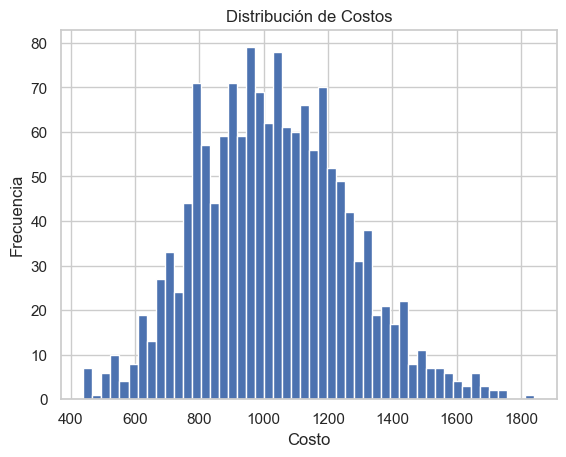

In [12]:
# plotear distribucion de costos
df_full['cost'].hist(bins=50)
plt.title('Distribución de Costos')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
df = df_full.groupby(["p", "n"]).mean().reset_index()
df

,p,n,total_time,comp_time,comm_time,overhead,cost
0,2,4,0.000330,0.000110,0.000107,0.000027,964.466667
1,2,6,0.001310,0.000970,0.000300,0.000007,897.233333
2,2,8,0.020517,0.016873,0.005227,-0.001600,1020.666667
3,2,10,0.335027,0.307303,0.024703,0.003013,977.066667
4,2,12,6.890211,5.972211,1.144178,-0.226156,936.444444
5,4,4,0.000580,0.000200,0.000380,0.000023,1113.333333
6,4,6,0.007037,0.001107,0.006177,-0.000247,1005.866667
7,4,8,0.069693,0.016510,0.060450,-0.007273,1010.733333
8,4,10,1.189633,0.318380,1.003827,-0.132573,979.366667
9,6,6,0.021283,0.001147,0.019577,0.000553,996.033333


### Tiempos de ejecución

In [14]:
import seaborn as sns

# 3. Realice gráficas de tiempos, speedup y eficiencia en función de
# procesos y analice el comportamiento del modelo en función a n y p

def plot_times_by_config(df: pd.DataFrame):
    # Estilo general
    sns.set(style="whitegrid")
    
    # Agrupar por promedio para evitar duplicados
    # df = df.groupby(["p", "n"]).mean().reset_index()
    configs = sorted(df["n"].unique())
    
    # Layout de subplots
    cols = 3
    rows = (len(configs) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4.5 * rows))
    axes = axes.flatten()

    # Colores personalizados (opcional)
    palette = sns.color_palette("Set2", n_colors=3)

    for idx, n_val in enumerate(configs):
        ax = axes[idx]
        df_config = df[df["n"] == n_val]

        # Dibujar líneas con estilo y colores agradables
        ax.plot(df_config["p"], df_config["total_time"], marker='o', label="Total Time", color=palette[0])
        ax.plot(df_config["p"], df_config["comm_time"], marker='s', label="Comm Time", color=palette[1])
        ax.plot(df_config["p"], df_config["comp_time"], marker='^', label="Comp Time", color=palette[2])

        ax.set_title(f"Configuración n = {n_val}", fontsize=13, weight='bold')
        ax.set_xlabel("Procesos (p)", fontsize=11)
        ax.set_ylabel("Tiempo (segundos)", fontsize=11)
        ax.tick_params(axis='both', labelsize=10)
        ax.legend(loc="best", fontsize=9)
        ax.grid(True, linestyle="--", alpha=0.7)

    # Eliminar gráficos vacíos
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

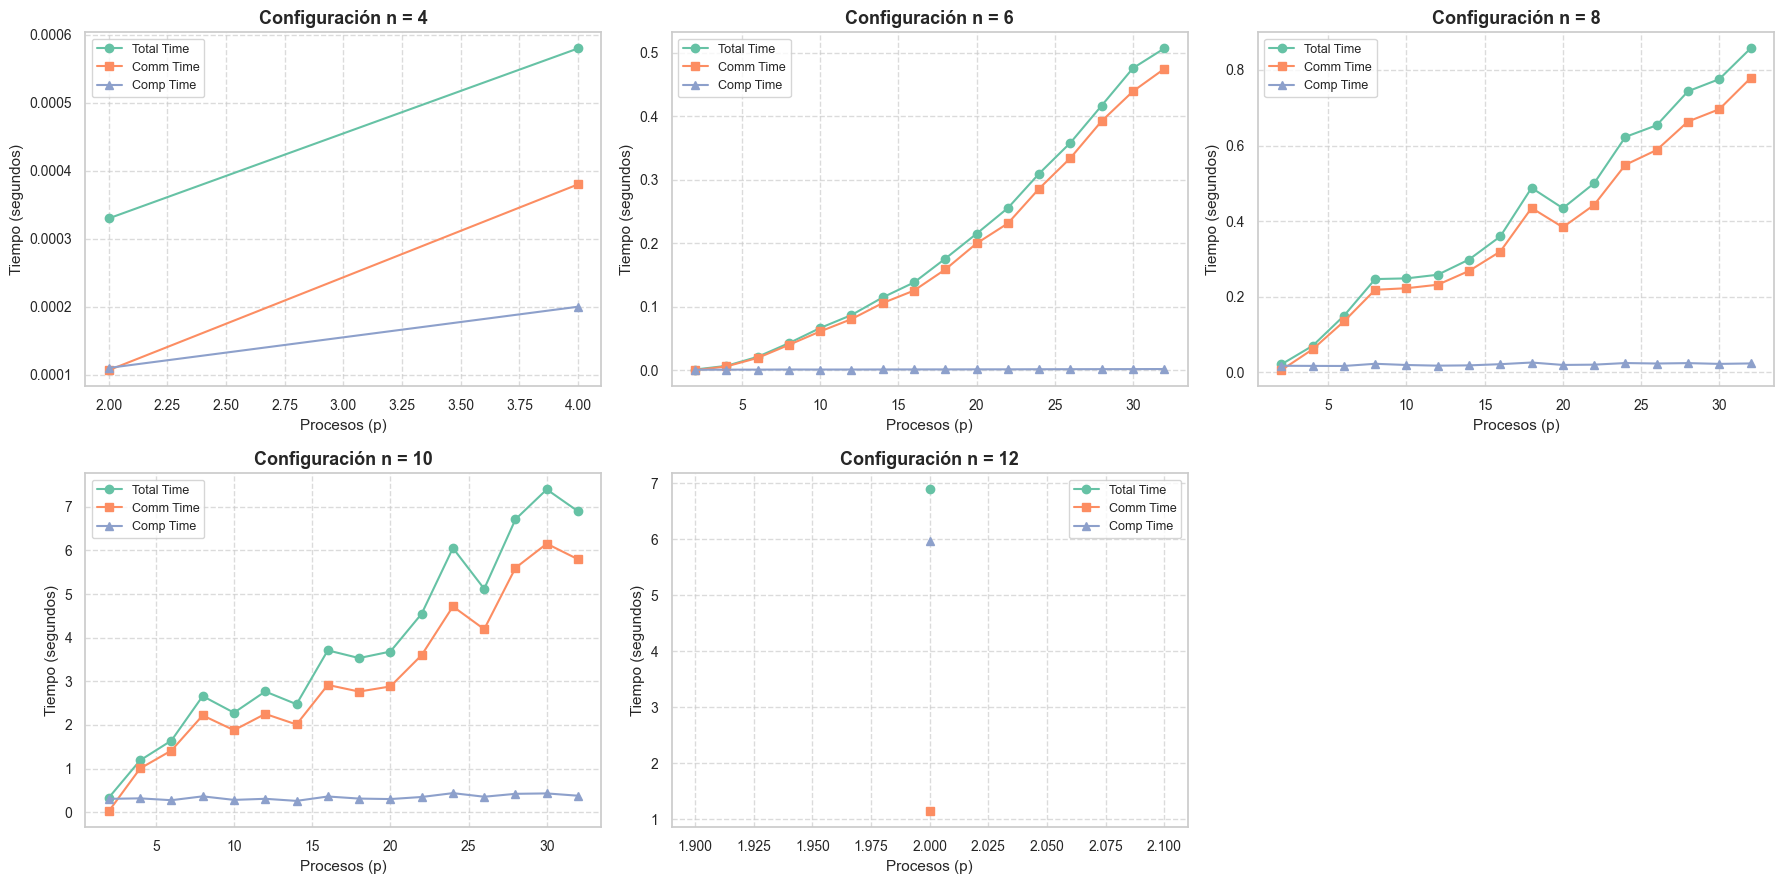

In [15]:
plot_times_by_config(df)

- Se puede observar que cuando tenemos pocos datos el tiempo de comunicación tiende a igualar o superar al tiempo de computo, como se observar en las dos primeras imagenes, en cambio, para los otros casos en donde aumenta la cantidad de datos, se observa que el tiempo de comunicación tiende a minimizarse con respecto al tiempo de computo. 

### Speedup

In [19]:
def add_speedup_column(df: pd.DataFrame, time_col_name='total_time') -> pd.DataFrame:
    df = df.copy()
    # df_grouped = df.groupby(["p", "n"]).mean().reset_index()
    df["speedup"] = 0.0

    valid_rows = []
    for n_val in df["n"].unique():
        subdf = df[df["n"] == n_val]
        if 1 not in subdf["p"].values:
            print(f"⚠️  Saltando N={n_val} (no hay p=1)")
            continue
        t1 = subdf[subdf["p"] == 1][time_col_name].values[0]
        subdf = subdf.copy()
        subdf["speedup"] = t1 / subdf[time_col_name]
        valid_rows.append(subdf)

    if valid_rows:
        return pd.concat(valid_rows, ignore_index=True)
    else:
        raise ValueError("No se pudo calcular speedup: faltan valores con p=1.")

def plot_speedup(df_speedup: pd.DataFrame):
    sns.set(style="whitegrid")
    palette = sns.color_palette("Set2", n_colors=len(df_speedup["n"].unique()))

    plt.figure(figsize=(10, 6))
    p_vals = np.array(sorted(df_speedup["p"].unique()))

    for idx, (n_val, subdf) in enumerate(df_speedup.groupby("n")):
        plt.plot(subdf["p"], subdf["speedup"], marker='o', label=f"N={n_val}", linewidth=2, color=palette[idx])
    
    # Línea teórica ideal: S = p
    plt.plot(p_vals, p_vals, '--', color='black', label="Teoría: S = p")
    # Línea teórica alternativa: S = 1 / (1/p + log(p) + p)
    # alt_speedup = 1 / (1 / p_vals + np.log(p_vals) + p_vals)
    # plt.plot(p_vals, alt_speedup, '-.', color='gray', label=r"Teoría: $S = \frac{1}{1/p + \log(p) + p}$")

    plt.title("Speedup vs Procesos", fontsize=14, weight='bold')
    plt.xlabel("Procesos (p)", fontsize=12)
    plt.ylabel("Speedup (S)", fontsize=12)
    plt.xticks(df_speedup["p"].unique())
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title="Tamaño de datos (N)", fontsize=9, title_fontsize=10)
    plt.tight_layout()
    plt.show()

In [20]:
df_speedup = add_speedup_column(df)
plot_speedup(df_speedup)

⚠️  Saltando N=4 (no hay p=1)
⚠️  Saltando N=6 (no hay p=1)
⚠️  Saltando N=8 (no hay p=1)
⚠️  Saltando N=10 (no hay p=1)
⚠️  Saltando N=12 (no hay p=1)


ValueError: No se pudo calcular speedup: faltan valores con p=1.

- Con base a la gráfica visualizada, hay una tendencia de incrementarse el speedup a mendidad que se incrementan la cantidad de datos y procesos, sin embargo, se alcanza un límite aproximadamente los 10 000 datos, de acuerdo a nuestros reultados. 

### FLOPs vs p

In [24]:
def add_flops_column(df: pd.DataFrame, time_col_name='total_time') -> pd.DataFrame:
    df = df.copy()
    # df_grouped = df.groupby(["p", "n"]).mean().reset_index()
    df["flops"] = 0.0

    valid_rows = []
    for n_val in df["n"].unique():
        subdf = df[df["n"] == n_val]
        if 1 not in subdf["p"].values:
            print(f"⚠️  Saltando N={n_val} (no hay p=1)")
            continue
        subdf = subdf.copy()
        subdf["flops"] = 64 * 8 * 0.8 * 0.2 * df["n"] * df["n"] / subdf[time_col_name] / 1000000000 # Convertir a GFlops
        valid_rows.append(subdf)

    if valid_rows:
        return pd.concat(valid_rows, ignore_index=True)
    else:
        raise ValueError("No se pudo calcular speedup: faltan valores con p=1.")

def plot_flops(df_flops: pd.DataFrame):
    sns.set(style="whitegrid")
    palette = sns.color_palette("Set2", n_colors=len(df_flops["n"].unique()))

    plt.figure(figsize=(10, 6))

    for idx, (n_val, subdf) in enumerate(df_flops.groupby("n")):
        plt.plot(subdf["p"], subdf["flops"], marker='o', label=f"N={n_val}", linewidth=2, color=palette[idx])
    
    plt.title("Flops vs Procesos", fontsize=14, weight='bold')
    plt.xlabel("Procesos (p)", fontsize=12)
    plt.ylabel("Flops (10^6)", fontsize=12)
    plt.yscale('linear')
    plt.xticks(df_flops["p"].unique())
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title="Tamaño de datos (N)", fontsize=9, title_fontsize=10)
    plt.tight_layout()
    plt.show()  

- Nota: Los Flops se han dividido entre un mil millón para tener lo valore representados en notación científica

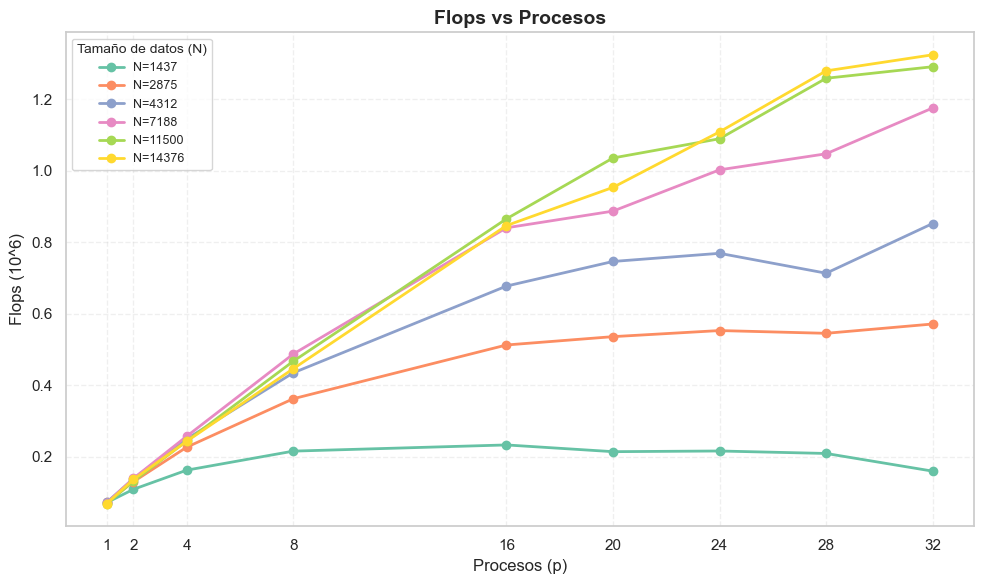

In [10]:
df_flops = add_flops_column(df)
plot_flops(df_flops)

Conclusión: Se pudo comprobar la relación proporcional entre el Speedup y los FLOPs respecto al número de procesos. A medida que se incrementa la cantidad de procesos, tanto el Speedup como los FLOPs presentan una tendencia creciente, lo que evidencia una mejora en el rendimiento del sistema paralelo.

### Complejidad teórica

In [25]:
# Utilice la complejidad teórica derivada en clase para validar el resultado obtenido. Describa como normaliza la expresión 
# teórica para que pueda superponerse a los experimentos. Encuentre asimismo, la cantidad óptima
# (teórica) de procesos y compárela con los datos obtenidos
def plot_results_con_brent(df, n_value):
    # Filtrar por el valor de n especificado
    filtered_df = df[df['n'] == n_value].copy()
    
    if filtered_df.empty:
        print(f"⚠️ No se encontraron datos para n = {n_value}")
        return
    
    # Ordenar por número de procesos
    filtered_df = filtered_df.sort_values('p')
    
    # Agrupar por número de procesos y calcular estadísticas
    stats_df = filtered_df.groupby('p').agg({
        'total_time': ['mean', 'std'],
        'comm_time': ['mean', 'std'],
        'comp_time': ['mean', 'std'],
        'accuracy': 'mean'
    }).reset_index()
    
    # Renombrar columnas para facilitar el acceso
    stats_df.columns = ['p', 'total_time_mean', 'total_time_std', 
                        'comm_time_mean', 'comm_time_std',
                        'comp_time_mean', 'comp_time_std', 'accuracy_mean']
    
    # Configurar el estilo de los gráficos
    plt.figure(figsize=(18, 6))
    sns.set_style("whitegrid")
    
    # 1. Gráfico: Tiempos vs Procesos
    plt.subplot(1, 3, 1)
    
    plt.errorbar(stats_df['p'], stats_df['total_time_mean'], yerr=stats_df['total_time_std'],
                 fmt='o-', capsize=5, label='Tiempo Total', color='red', linewidth=2)
    
    plt.errorbar(stats_df['p'], stats_df['comp_time_mean'], yerr=stats_df['comp_time_std'],
                 fmt='s-', capsize=5, label='Tiempo de Computación', color='blue', linewidth=2)
    
    plt.errorbar(stats_df['p'], stats_df['comm_time_mean'], yerr=stats_df['comm_time_std'],
                 fmt='^-', capsize=5, label='Tiempo de Comunicación', color='green', linewidth=2)
    
    plt.xlabel('Número de Procesos (p)')
    plt.ylabel('Tiempo (segundos)')
    plt.title(f'Tiempos vs Procesos\n(n = {n_value})')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # 2. Gráfico: Comparación con Teorema de Brent
    plt.subplot(1, 3, 2)
    
    # Obtener datos base (p=1) para aplicar Brent
    base_row = stats_df[stats_df['p'] == 1]
    if base_row.empty:
        # Si no hay p=1, usar el menor número de procesos disponible
        base_row = stats_df.iloc[0:1]
        base_p = base_row['p'].iloc[0]
        print(f"⚠️ No se encontró p=1. Usando p={base_p} como referencia.")
    else:
        base_p = 1
    
    # Calcular W (trabajo total secuencial) y overhead de comunicación
    W = float(base_row['comp_time_mean'].iloc[0]) * base_p  # Trabajo total
    T_comm_base = float(base_row['comm_time_mean'].iloc[0])  # Comunicación base
    
    # Aplicar Teorema de Brent: T(p) = W/p + T_comm
    # Asumimos que el tiempo de comunicación escala con el número de procesos
    p_values = stats_df['p'].values
    T_brent_ideal = W / p_values  # Solo computación (caso ideal)
    T_brent_real = W / p_values + stats_df['comm_time_mean']  # Con comunicación real
    
    # Graficar comparación
    plt.plot(p_values, stats_df['total_time_mean'], 'o-', 
             label='Tiempo Experimental', color='red', linewidth=2, markersize=8)
    plt.plot(p_values, T_brent_ideal, 'x--', 
             label='Brent Ideal (sin comm)', color='blue', linewidth=2, markersize=8)
    plt.plot(p_values, T_brent_real, 's--', 
             label='Brent + Comm Real', color='orange', linewidth=2, markersize=6)
    
    plt.xlabel('Número de Procesos (p)')
    plt.ylabel('Tiempo Total (segundos)')
    plt.title(f'Comparación con Teorema de Brent\n(n = {n_value})')
    plt.grid(True, alpha=0.3)
    plt.legend()
    # plt.yscale('log')
    
    # 3. Gráfico: Eficiencia y Speedup
    plt.subplot(1, 3, 3)
    
    # Calcular speedup y eficiencia
    T_secuencial = stats_df[stats_df['p'] == stats_df['p'].min()]['total_time_mean'].iloc[0]
    speedup = T_secuencial / stats_df['total_time_mean']
    eficiencia = speedup / stats_df['p']
    speedup_ideal = T_secuencial / T_brent_ideal
    
    # Graficar speedup
    ax1 = plt.gca()
    line1 = ax1.plot(p_values, speedup, 'o-', color='purple', linewidth=2, label='Speedup Real')
    line2 = ax1.plot(p_values, speedup_ideal, '--', color='gray', linewidth=2, label='Speedup Ideal')
    line3 = ax1.plot(p_values, p_values, ':', color='black', alpha=0.5, label='Speedup Lineal')
    
    ax1.set_xlabel('Número de Procesos (p)')
    ax1.set_ylabel('Speedup', color='purple')
    ax1.tick_params(axis='y', labelcolor='purple')
    ax1.grid(True, alpha=0.3)
    
    # Segundo eje Y para eficiencia
    ax2 = ax1.twinx()
    line4 = ax2.plot(p_values, eficiencia * 100, 's-', color='darkgreen', linewidth=2, label='Eficiencia (%)')
    ax2.set_ylabel('Eficiencia (%)', color='darkgreen')
    ax2.tick_params(axis='y', labelcolor='darkgreen')
    ax2.set_ylim(0, 100)
    
    # Combinar leyendas
    lines = line1 + line2 + line3 + line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right')
    
    plt.title(f'Speedup y Eficiencia\n(n = {n_value})')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla resumen
    print(f"\n{'='*60}")
    print(f"RESUMEN - TEOREMA DE BRENT (n = {n_value})")
    print(f"{'='*60}")
    print(f"Trabajo total estimado (W): {W:.4f} segundos")
    print(f"Tiempo comunicación base: {T_comm_base:.4f} segundos")
    print(f"\n{'Procesos':<8} {'T_exp':<8} {'T_Brent':<8} {'Speedup':<8} {'Eficiencia':<10} {'Accuracy':<8}")
    print(f"{'-'*60}")
    
    for i, row in stats_df.iterrows():
        p = int(row['p'])
        t_exp = row['total_time_mean']
        t_brent = W/p + row['comm_time_mean']
        sp = T_secuencial / t_exp
        eff = sp / p * 100
        acc = row['accuracy_mean']
        
        print(f"{p:<8} {t_exp:<8.4f} {t_brent:<8.4f} {sp:<8.2f} {eff:<10.1f}% {acc:<8.4f}")

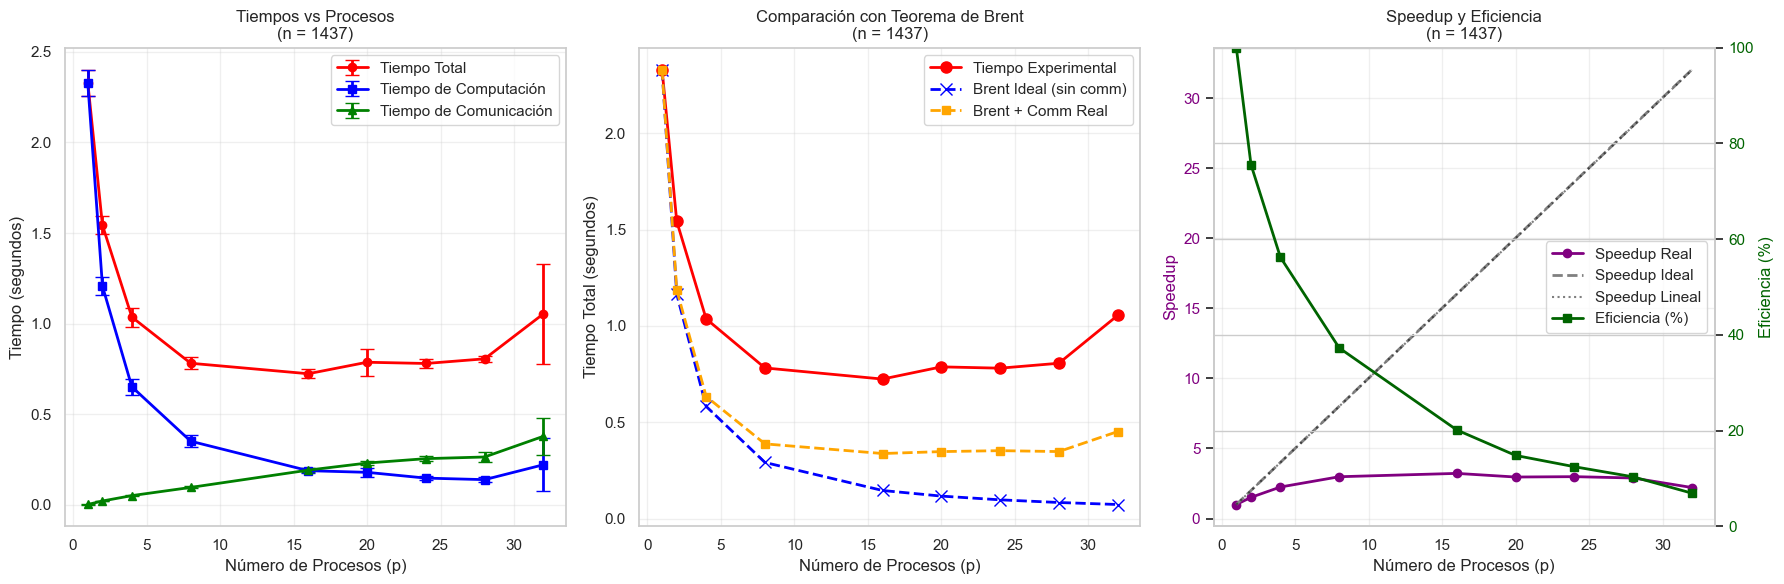


RESUMEN - TEOREMA DE BRENT (n = 1437)
Trabajo total estimado (W): 2.3284 segundos
Tiempo comunicación base: 0.0023 segundos

Procesos T_exp    T_Brent  Speedup  Eficiencia Accuracy
------------------------------------------------------------
1        2.3307   2.3307   1.00     100.0     % 0.9874  
2        1.5426   1.1858   1.51     75.5      % 0.9874  
4        1.0365   0.6334   2.25     56.2      % 0.9870  
8        0.7817   0.3875   2.98     37.3      % 0.9879  
16       0.7239   0.3374   3.22     20.1      % 0.9896  
20       0.7873   0.3474   2.96     14.8      % 0.9868  
24       0.7805   0.3523   2.99     12.4      % 0.9886  
28       0.8061   0.3476   2.89     10.3      % 0.9870  
32       1.0545   0.4514   2.21     6.9       % 0.9867  


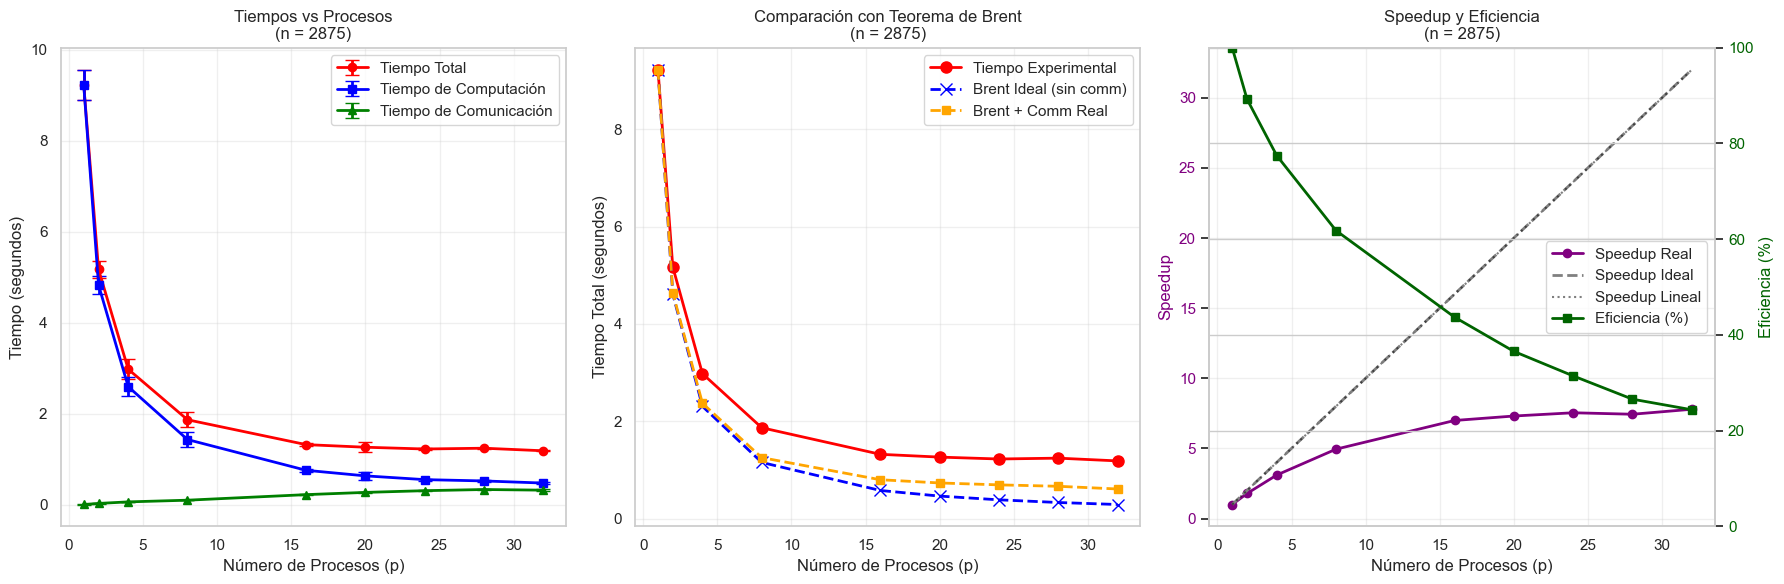


RESUMEN - TEOREMA DE BRENT (n = 2875)
Trabajo total estimado (W): 9.2249 segundos
Tiempo comunicación base: 0.0040 segundos

Procesos T_exp    T_Brent  Speedup  Eficiencia Accuracy
------------------------------------------------------------
1        9.2289   9.2289   1.00     100.0     % 0.9884  
2        5.1700   4.6399   1.79     89.3      % 0.9872  
4        2.9775   2.3676   3.10     77.5      % 0.9874  
8        1.8665   1.2517   4.94     61.8      % 0.9883  
16       1.3200   0.7973   6.99     43.7      % 0.9904  
20       1.2626   0.7312   7.31     36.5      % 0.9899  
24       1.2237   0.6920   7.54     31.4      % 0.9913  
28       1.2411   0.6628   7.44     26.6      % 0.9907  
32       1.1845   0.6073   7.79     24.3      % 0.9865  


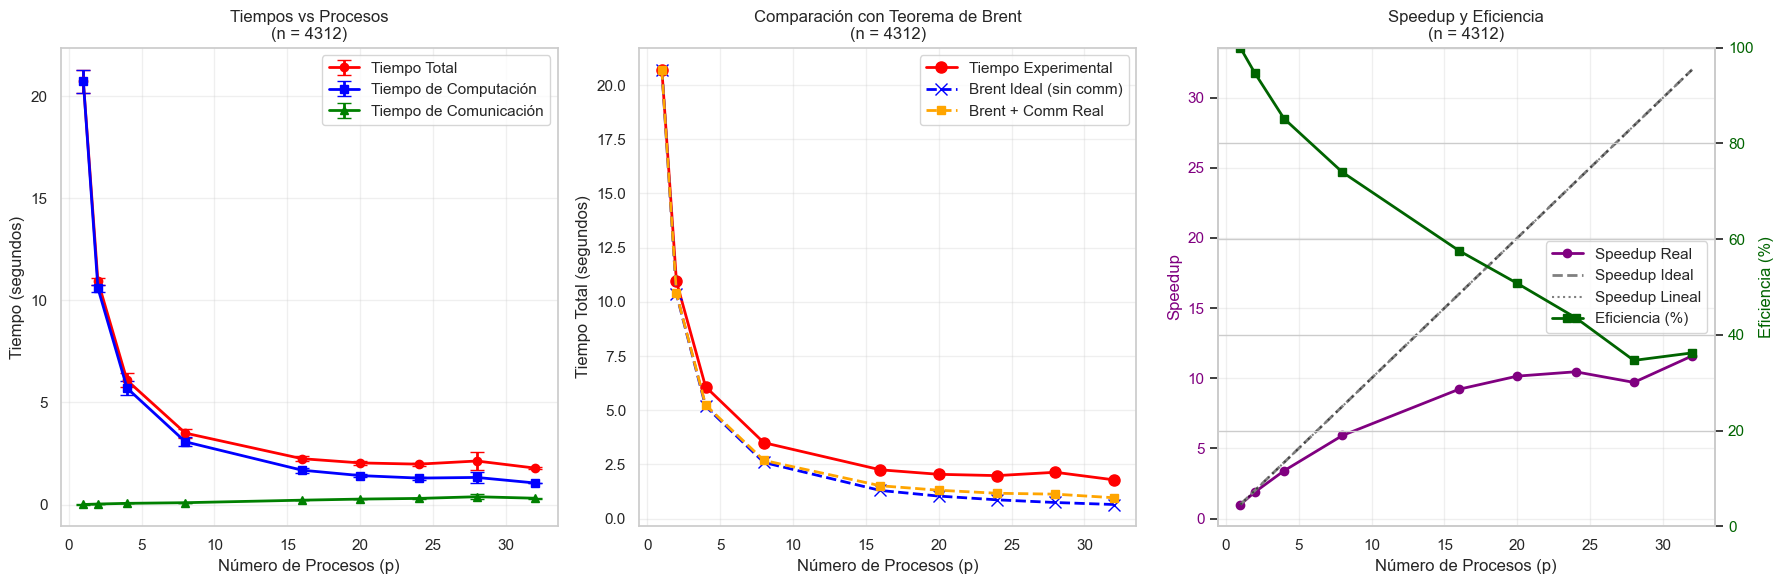


RESUMEN - TEOREMA DE BRENT (n = 4312)
Trabajo total estimado (W): 20.7131 segundos
Tiempo comunicación base: 0.0054 segundos

Procesos T_exp    T_Brent  Speedup  Eficiencia Accuracy
------------------------------------------------------------
1        20.7184  20.7184  1.00     100.0     % 0.9954  
2        10.9413  10.3855  1.89     94.7      % 0.9962  
4        6.0806   5.2403   3.41     85.2      % 0.9966  
8        3.4999   2.6829   5.92     74.0      % 0.9965  
16       2.2480   1.5117   9.22     57.6      % 0.9961  
20       2.0407   1.3058   10.15    50.8      % 0.9956  
24       1.9803   1.1658   10.46    43.6      % 0.9965  
28       2.1346   1.1250   9.71     34.7      % 0.9963  
32       1.7868   0.9600   11.60    36.2      % 0.9969  


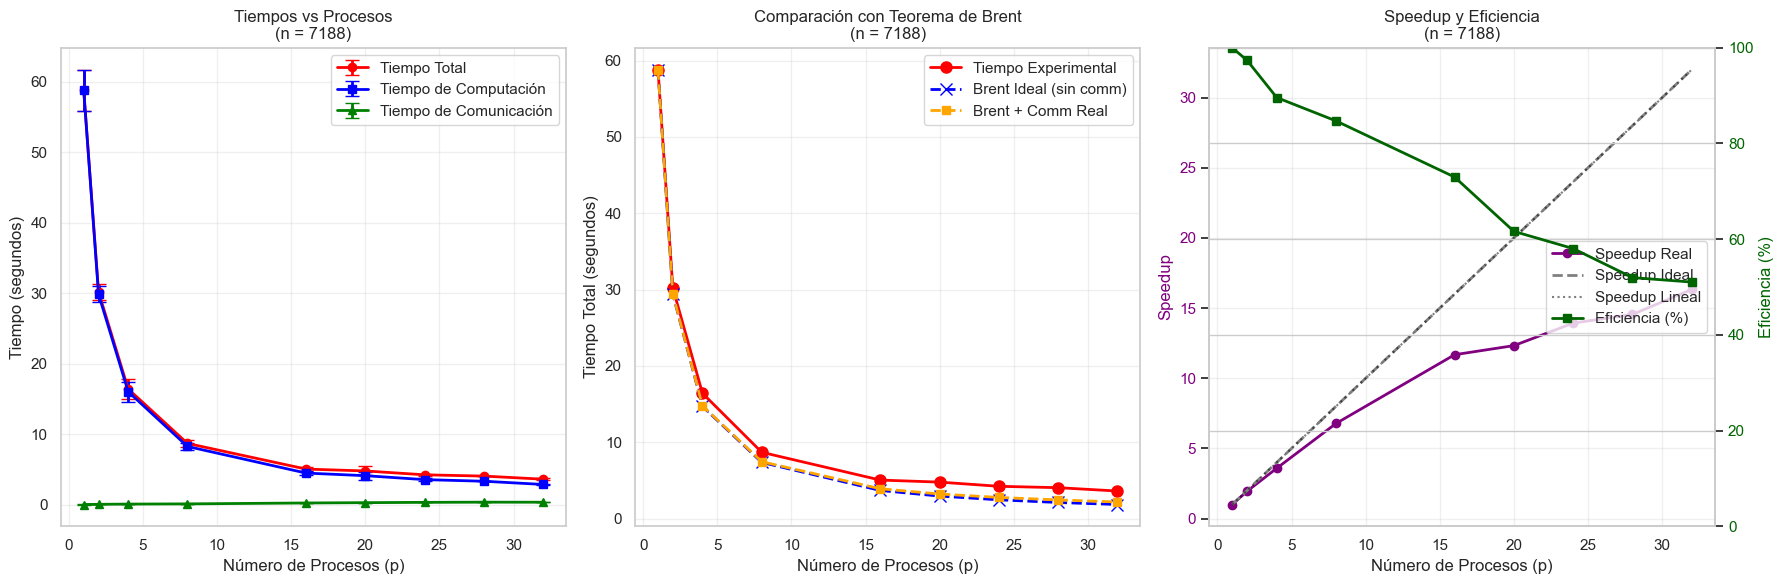


RESUMEN - TEOREMA DE BRENT (n = 7188)
Trabajo total estimado (W): 58.8057 segundos
Tiempo comunicación base: 0.0080 segundos

Procesos T_exp    T_Brent  Speedup  Eficiencia Accuracy
------------------------------------------------------------
1        58.8138  58.8138  1.00     100.0     % 1.0000  
2        30.2007  29.4355  1.95     97.4      % 0.9997  
4        16.4096  14.7686  3.58     89.6      % 0.9989  
8        8.6779   7.4465   6.78     84.7      % 0.9998  
16       5.0364   3.8994   11.68    73.0      % 0.9991  
20       4.7714   3.2105   12.33    61.6      % 0.9996  
24       4.2224   2.7636   13.93    58.0      % 0.9992  
28       4.0415   2.4394   14.55    52.0      % 0.9993  
32       3.6012   2.1696   16.33    51.0      % 1.0000  


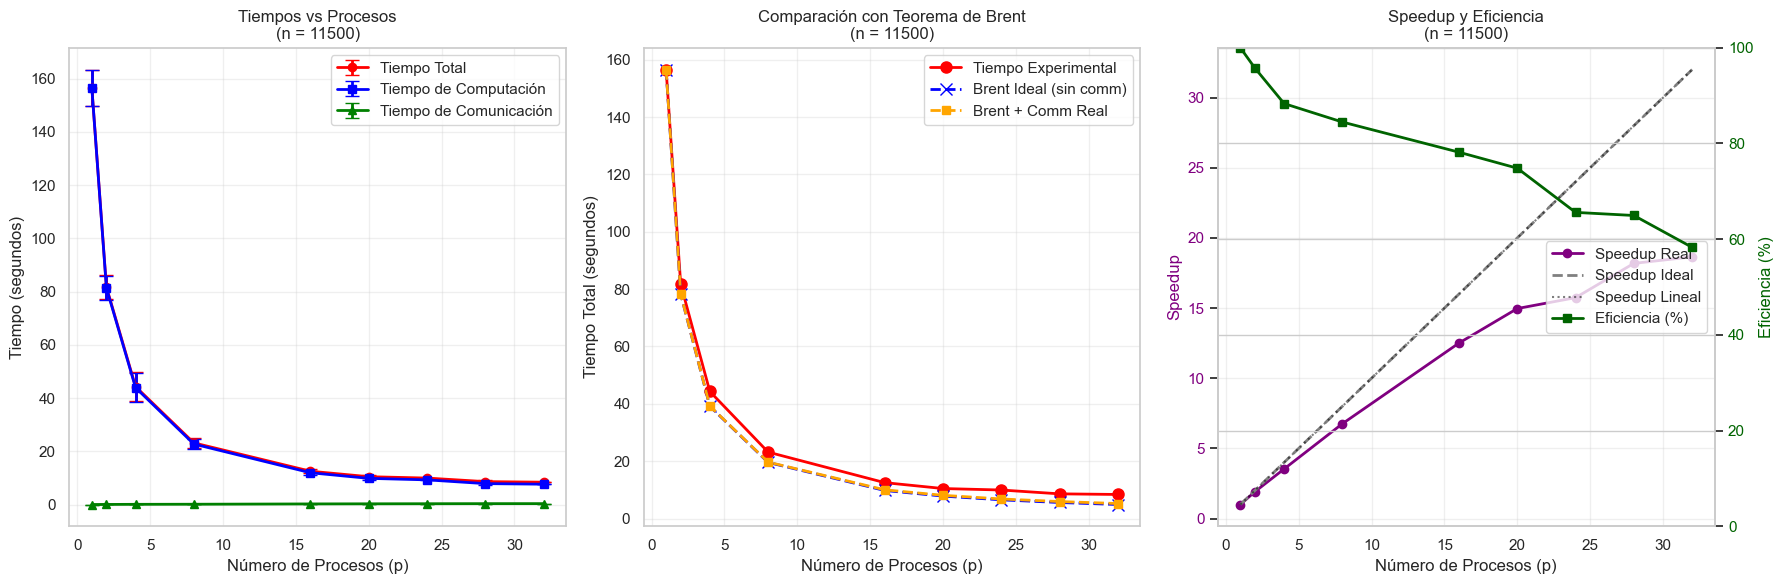


RESUMEN - TEOREMA DE BRENT (n = 11500)
Trabajo total estimado (W): 156.5758 segundos
Tiempo comunicación base: 0.0120 segundos

Procesos T_exp    T_Brent  Speedup  Eficiencia Accuracy
------------------------------------------------------------
1        156.5878 156.5878 1.00     100.0     % 1.0000  
2        81.7670  78.3218  1.92     95.8      % 1.0000  
4        44.3115  39.2226  3.53     88.3      % 1.0000  
8        23.1680  19.6836  6.76     84.5      % 1.0000  
16       12.5182  10.0138  12.51    78.2      % 1.0000  
20       10.4617  8.0972   14.97    74.8      % 1.0000  
24       9.9457   6.8249   15.74    65.6      % 1.0000  
28       8.6100   5.9232   18.19    65.0      % 1.0000  
32       8.3946   5.2319   18.65    58.3      % 1.0000  


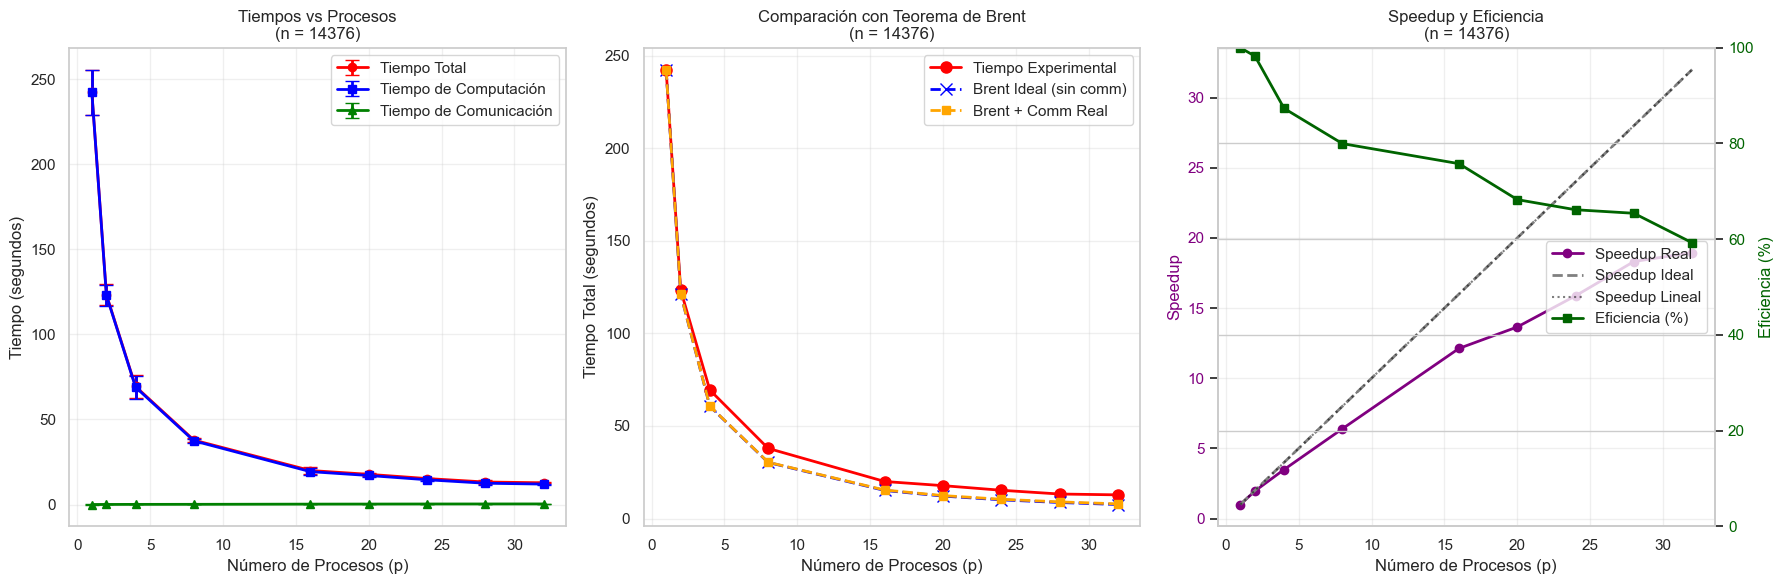


RESUMEN - TEOREMA DE BRENT (n = 14376)
Trabajo total estimado (W): 242.4528 segundos
Tiempo comunicación base: 0.0156 segundos

Procesos T_exp    T_Brent  Speedup  Eficiencia Accuracy
------------------------------------------------------------
1        242.4685 242.4684 1.00     100.0     % 1.0000  
2        123.3796 121.2711 1.97     98.3      % 1.0000  
4        69.4084  60.7011  3.49     87.3      % 1.0000  
8        37.8980  30.4255  6.40     80.0      % 1.0000  
16       19.9969  15.3901  12.13    75.8      % 1.0000  
20       17.7579  12.3926  13.65    68.3      % 1.0000  
24       15.2720  10.4135  15.88    66.2      % 1.0000  
28       13.2378  8.9893   18.32    65.4      % 1.0000  
32       12.7880  7.9241   18.96    59.3      % 1.0000  


In [26]:
plot_results_con_brent(df_full, n_value=1437)
plot_results_con_brent(df_full, n_value=2875)
plot_results_con_brent(df_full, n_value=4312)
plot_results_con_brent(df_full, n_value=7188)
plot_results_con_brent(df_full, n_value=11500)
plot_results_con_brent(df_full, n_value=14376)

- Con base a lo observado, se concluye que el tiempo experimental es mayor a comparación del tiempo teórico (Brent), a medida que se incrementan los procesos, sin embargo, la diferencia entre ambos tiempos se va reduciendo notoriamente a medida que se incrementa la cantidad de datos, lo cuál se puede observar a partir de los 7000 datos.

### Escalabilidad fuerte y débil

In [27]:
# 5. Haga un análisis de escalabilidad fuerte y débil. Defina una cantidad de
# datos y procesos deseada y determine si se mantendría escalable para esos datos
def plot_weak_scaling(df, n_value):
    # Filtrar por el valor de n especificado
    filtered_df = df[df['n'] == n_value].copy()
    
    if filtered_df.empty:
        print(f"⚠️ No se encontraron datos para n = {n_value}")
        return
    
    filtered_df = filtered_df.sort_values('p')
    
    # Agrupar por número de procesos y calcular estadísticas
    stats_df = filtered_df.groupby('p').agg({
        'total_time': ['mean', 'std'],
        'comm_time': ['mean', 'std'],
        'comp_time': ['mean', 'std'],
        'accuracy': 'mean'
    }).reset_index()
    
    # Renombrar columnas para facilitar el acceso
    stats_df.columns = ['p', 'total_time_mean', 'total_time_std',
                        'comm_time_mean', 'comm_time_std',
                        'comp_time_mean', 'comp_time_std', 'accuracy_mean']
    
    plt.figure(figsize=(18, 6))
    sns.set_style("whitegrid")
    
    # Obtener tiempo secuencial (p=1) como referencia
    t_seq_row = stats_df[stats_df['p'] == 1]
    if len(t_seq_row) > 0:
        t_seq = t_seq_row['total_time_mean'].iloc[0]
        t_comp_seq = t_seq_row['comp_time_mean'].iloc[0]
        t_comm_seq = t_seq_row['comm_time_mean'].iloc[0]
    else:
        # Si no hay p=1, usar el menor número de procesos
        min_p_row = stats_df.iloc[0]
        t_seq = min_p_row['total_time_mean'] * min_p_row['p']
        t_comp_seq = min_p_row['comp_time_mean'] * min_p_row['p']
        t_comm_seq = min_p_row['comm_time_mean']
        print(f"⚠️ No se encontró p=1. Estimando tiempo secuencial.")
    
    # Calcular métricas de escalabilidad
    stats_df['speedup'] = t_seq / stats_df['total_time_mean']
    stats_df['efficiency'] = stats_df['speedup'] / stats_df['p']
    
    # Calcular fracción secuencial para Gustafson-Barsis
    # α = fracción de trabajo que no puede paralelizarse
    alpha = stats_df['comm_time_mean'].mean() / stats_df['total_time_mean'].mean()
    
    # Speedup teórico según Gustafson-Barsis: S(p) = p - α(p-1)
    gustafson_speedup = stats_df['p'] - alpha * (stats_df['p'] - 1)
    gustafson_efficiency = gustafson_speedup / stats_df['p']
    
    # Subplot 1: Speedup Experimental vs Teórico
    plt.subplot(1, 3, 1)
    
    # Speedup experimental
    plt.plot(stats_df['p'], stats_df['speedup'], 'o-', 
             label='Speedup Experimental', color='blue', linewidth=2, markersize=8)
    
    # Speedup teórico de Gustafson
    plt.plot(stats_df['p'], gustafson_speedup, 'd--', 
             label='Speedup Gustafson-Barsis', color='red', linewidth=2, markersize=6)
    
    # Speedup ideal (lineal)
    plt.plot(stats_df['p'], stats_df['p'], ':', 
             label='Speedup Ideal (Lineal)', color='gray', alpha=0.7, linewidth=2)
    
    plt.xlabel('Número de Procesos (p)', fontsize=12)
    plt.ylabel('Speedup', fontsize=12)
    plt.title(f'Escalabilidad Débil: Speedup\n(n = {n_value}, α = {alpha:.3f})', fontsize=13)
    
    # Ajustar límites según los datos
    max_p = stats_df['p'].max()
    max_speedup = max(stats_df['speedup'].max(), gustafson_speedup.max())
    plt.xlim(0, max_p + 2)
    plt.ylim(0, max_speedup * 1.1)
    
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Subplot 2: Eficiencia vs Número de Procesos
    plt.subplot(1, 3, 2)
    
    # Eficiencia experimental
    plt.plot(stats_df['p'], stats_df['efficiency'], 's-', 
             label='Eficiencia Experimental', color='green', linewidth=2, markersize=8)
    
    # Eficiencia teórica de Gustafson
    plt.plot(stats_df['p'], gustafson_efficiency, '^--', 
             label='Eficiencia Gustafson-Barsis', color='orange', linewidth=2, markersize=6)
    
    plt.xlabel('Número de Procesos (p)', fontsize=12)
    plt.ylabel('Eficiencia', fontsize=12)
    plt.title(f'Escalabilidad Débil: Eficiencia\n(n = {n_value})', fontsize=13)
    
    plt.xlim(0, max_p + 2)
    plt.ylim(0, 1.1)
    
    # Líneas de referencia
    plt.axhline(y=1.0, color='black', linestyle=':', alpha=0.5, label='Eficiencia Ideal (100%)')
    plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='Umbral Práctico (80%)')
    
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Subplot 3: Análisis de Componentes de Tiempo
    plt.subplot(1, 3, 3)
    
    # Tiempo de computación vs comunicación
    comp_percentage = stats_df['comp_time_mean'] / stats_df['total_time_mean'] * 100
    comm_percentage = stats_df['comm_time_mean'] / stats_df['total_time_mean'] * 100
    
    plt.plot(stats_df['p'], comp_percentage, 'o-', 
             label='% Tiempo Computación', color='blue', linewidth=2, markersize=6)
    plt.plot(stats_df['p'], comm_percentage, 's-', 
             label='% Tiempo Comunicación', color='red', linewidth=2, markersize=6)
    
    # Línea de eficiencia como porcentaje
    efficiency_percentage = stats_df['efficiency'] * 100
    plt.plot(stats_df['p'], efficiency_percentage, '^--', 
             label='Eficiencia (%)', color='green', linewidth=2, markersize=6, alpha=0.8)
    
    plt.xlabel('Número de Procesos (p)', fontsize=12)
    plt.ylabel('Porcentaje (%)', fontsize=12)
    plt.title(f'Distribución de Tiempo y Eficiencia\n(n = {n_value})', fontsize=13)
    
    plt.xlim(0, max_p + 2)
    plt.ylim(0, 100)
    
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla resumen
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE ESCALABILIDAD DÉBIL - n = {n_value}")
    print(f"{'='*80}")
    print(f"Tiempo secuencial (T₁): {t_seq:.4f} segundos")
    print(f"Fracción secuencial (α): {alpha:.4f}")
    print(f"Trabajo por proceso: {n_value/1:.0f} elementos por proceso base")
    
    print(f"\n{'Proc':<5} {'T_total':<8} {'Speedup':<8} {'S_Gust':<8} {'Efic_Exp':<9} {'Efic_Gust':<9} {'Comp%':<6} {'Comm%':<6} {'Accuracy':<8}")
    print(f"{'-'*80}")
    
    for i, row in stats_df.iterrows():
        p = int(row['p'])
        t_total = row['total_time_mean']
        speedup_exp = row['speedup']
        speedup_gust = gustafson_speedup.iloc[i]
        eff_exp = row['efficiency']
        eff_gust = gustafson_efficiency.iloc[i]
        comp_pct = comp_percentage.iloc[i]
        comm_pct = comm_percentage.iloc[i]
        accuracy = row['accuracy_mean']
        
        print(f"{p:<5} {t_total:<8.4f} {speedup_exp:<8.2f} {speedup_gust:<8.2f} "
              f"{eff_exp:<9.3f} {eff_gust:<9.3f} {comp_pct:<6.1f} {comm_pct:<6.1f} {accuracy:<8.4f}")
    
    # Evaluación de escalabilidad
    print(f"\n{'EVALUACIÓN DE ESCALABILIDAD'}")
    print(f"{'-'*40}")
    
    # Encontrar el mejor punto de escalabilidad
    best_efficiency = stats_df['efficiency'].max()
    best_p = stats_df.loc[stats_df['efficiency'].idxmax(), 'p']
    
    print(f"✅ Mejor eficiencia: {best_efficiency:.3f} con p = {int(best_p)}")
    
    # Contar configuraciones con buena eficiencia
    good_configs = stats_df[stats_df['efficiency'] >= 0.8]
    acceptable_configs = stats_df[stats_df['efficiency'] >= 0.6]
    
    if len(good_configs) > 0:
        print(f"✅ Configuraciones con eficiencia ≥ 80%: {len(good_configs)} de {len(stats_df)}")
        print(f"   Procesos recomendados: {list(good_configs['p'].astype(int))}")
    elif len(acceptable_configs) > 0:
        print(f"⚠️ Configuraciones con eficiencia ≥ 60%: {len(acceptable_configs)} de {len(stats_df)}")
        print(f"   Procesos aceptables: {list(acceptable_configs['p'].astype(int))}")
    else:
        print(f"❌ Ninguna configuración alcanza 60% de eficiencia")
    
    # Análisis de balance computación/comunicación
    avg_comp_pct = comp_percentage.mean()
    avg_comm_pct = comm_percentage.mean()
    
    print(f"\n{'BALANCE COMPUTACIÓN/COMUNICACIÓN'}")
    print(f"{'-'*40}")
    print(f"Promedio Computación: {avg_comp_pct:.1f}%")
    print(f"Promedio Comunicación: {avg_comm_pct:.1f}%")
    
    if avg_comm_pct > 20:
        print(f"⚠️ Alto overhead de comunicación ({avg_comm_pct:.1f}%) - Limitará escalabilidad")
    elif avg_comm_pct > 10:
        print(f"✅ Overhead de comunicación moderado ({avg_comm_pct:.1f}%)")
    else:
        print(f"✅ Bajo overhead de comunicación ({avg_comm_pct:.1f}%) - Buena escalabilidad")

In [14]:
def plot_strong_scaling(df, n_value):
    # Filtrar por tamaño de dataset
    filtered_df = df[df['n'] == n_value].copy()
    filtered_df = filtered_df.sort_values('p')
    
    # Calcular estadísticas por número de procesos
    stats_df = filtered_df.groupby('p').agg({
        'total_time': ['mean', 'std'],
        'comm_time': ['mean', 'std'],
        'comp_time': ['mean', 'std'],
        'accuracy': ['mean', 'std']
    }).reset_index()
    
    # Aplanar nombres de columnas
    stats_df.columns = ['p', 'total_time_mean', 'total_time_std', 
                        'comm_time_mean', 'comm_time_std',
                        'comp_time_mean', 'comp_time_std',
                        'accuracy_mean', 'accuracy_std']
    
    plt.figure(figsize=(16, 12))   
    sns.set_style("whitegrid")
    
    # Obtener tiempo secuencial (p=1)
    t_seq = stats_df.loc[stats_df['p'] == 1, 'total_time_mean'].values
    if len(t_seq) > 0:
        t_seq = t_seq[0]
        
        # Calcular speedup y eficiencia
        stats_df['speedup'] = t_seq / stats_df['total_time_mean']
        stats_df['efficiency'] = stats_df['speedup'] / stats_df['p']
        
        # Estimar fracción paralela para Amdahl
        # Usar la proporción de tiempo de cómputo vs comunicación
        f_parallel = stats_df['comp_time_mean'].mean() / stats_df['total_time_mean'].mean()
        f_parallel = max(0.5, min(0.95, f_parallel))  # Limitar entre 0.5 y 0.95
        
        # Curva teórica de Amdahl
        amdahl_speedup = 1 / ((1 - f_parallel) + (f_parallel / stats_df['p']))
        
        # Subplot 1: Speedup y Amdahl
        plt.subplot(2, 2, 1)
        plt.plot(stats_df['p'], stats_df['speedup'], 'o-', 
                label='Speedup Experimental', color='blue', markersize=8, linewidth=2)
        plt.plot(stats_df['p'], amdahl_speedup, 'd--', 
                label=f'Amdahl Teórico (f={f_parallel:.2f})', color='red', markersize=6)
        plt.plot(stats_df['p'], stats_df['p'], ':', 
                label='Speedup Ideal', color='gray', alpha=0.7)
        
        plt.xlabel('Número de Procesos', fontsize=12)
        plt.ylabel('Speedup', fontsize=12)
        plt.title(f'Escalabilidad Fuerte - Speedup (n={n_value})')
        plt.xlim(0, 26)
        plt.ylim(0, max(stats_df['speedup'].max(), 12))
        plt.xticks(stats_df['p'], fontsize=11)
        plt.yticks(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)

        # Subplot 2: Eficiencia
        plt.subplot(2, 2, 2)
        plt.plot(stats_df['p'], stats_df['efficiency'], 's-', 
                label='Eficiencia', color='green', markersize=8, linewidth=2)
        plt.axhline(y=0.8, color='orange', linestyle='--', linewidth=2, 
                   label='Umbral Eficiencia (80%)')
        plt.axhline(y=0.5, color='red', linestyle=':', linewidth=1, 
                   label='Eficiencia Mínima (50%)')
        
        plt.xlabel('Número de Procesos', fontsize=12)
        plt.ylabel('Eficiencia', fontsize=12)
        plt.title(f'Escalabilidad Fuerte - Eficiencia (n={n_value})')
        plt.xlim(0, 26)
        plt.ylim(0, 1.1)
        plt.xticks(stats_df['p'], fontsize=11)
        plt.yticks(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)

    plt.tight_layout(pad=3.0)
    plt.show()
    
    # Imprimir estadísticas resumidas
    print(f"\n=== RESUMEN STRONG SCALING (n={n_value}) ===")
    print(f"Speedup máximo: {stats_df['speedup'].max():.2f}x (con {stats_df.loc[stats_df['speedup'].idxmax(), 'p']} procesos)")
    print(f"Eficiencia con 24 procesos: {stats_df.loc[stats_df['p']==24, 'efficiency'].values[0]:.3f}")
    print(f"Tiempo secuencial (1 proceso): {t_seq:.3f}s")
    print(f"Tiempo con 24 procesos: {stats_df.loc[stats_df['p']==24, 'total_time_mean'].values[0]:.3f}s")
    print(f"Accuracy promedio: {stats_df['accuracy_mean'].mean():.4f} ± {stats_df['accuracy_std'].mean():.4f}")

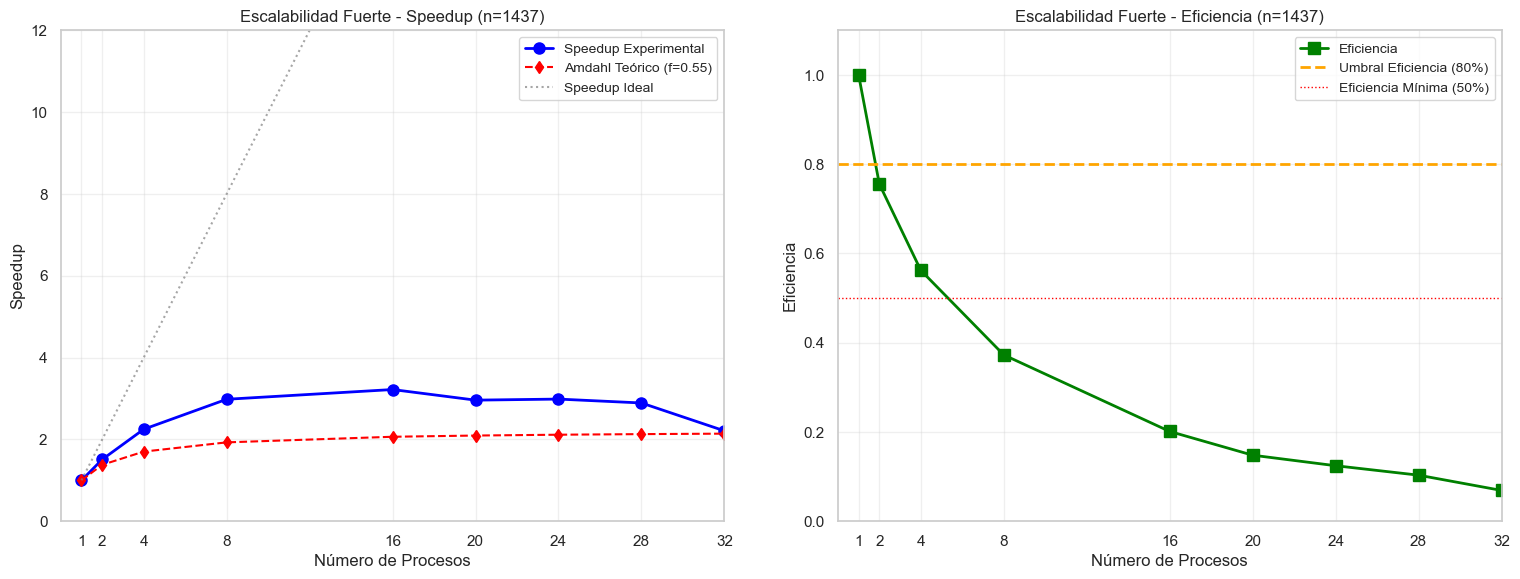


=== RESUMEN STRONG SCALING (n=1437) ===
Speedup máximo: 3.22x (con 16 procesos)
Eficiencia con 24 procesos: 0.124
Tiempo secuencial (1 proceso): 2.331s
Tiempo con 24 procesos: 0.780s
Accuracy promedio: 0.9876 ± nan


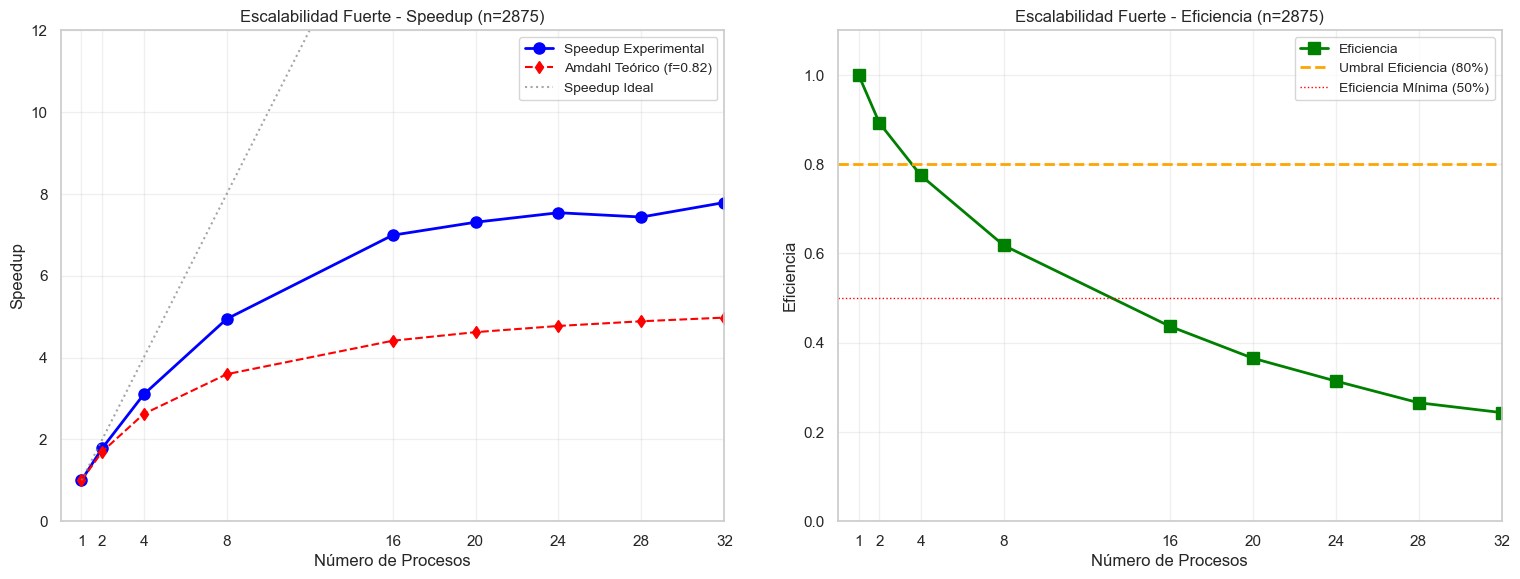


=== RESUMEN STRONG SCALING (n=2875) ===
Speedup máximo: 7.79x (con 32 procesos)
Eficiencia con 24 procesos: 0.314
Tiempo secuencial (1 proceso): 9.229s
Tiempo con 24 procesos: 1.224s
Accuracy promedio: 0.9889 ± nan


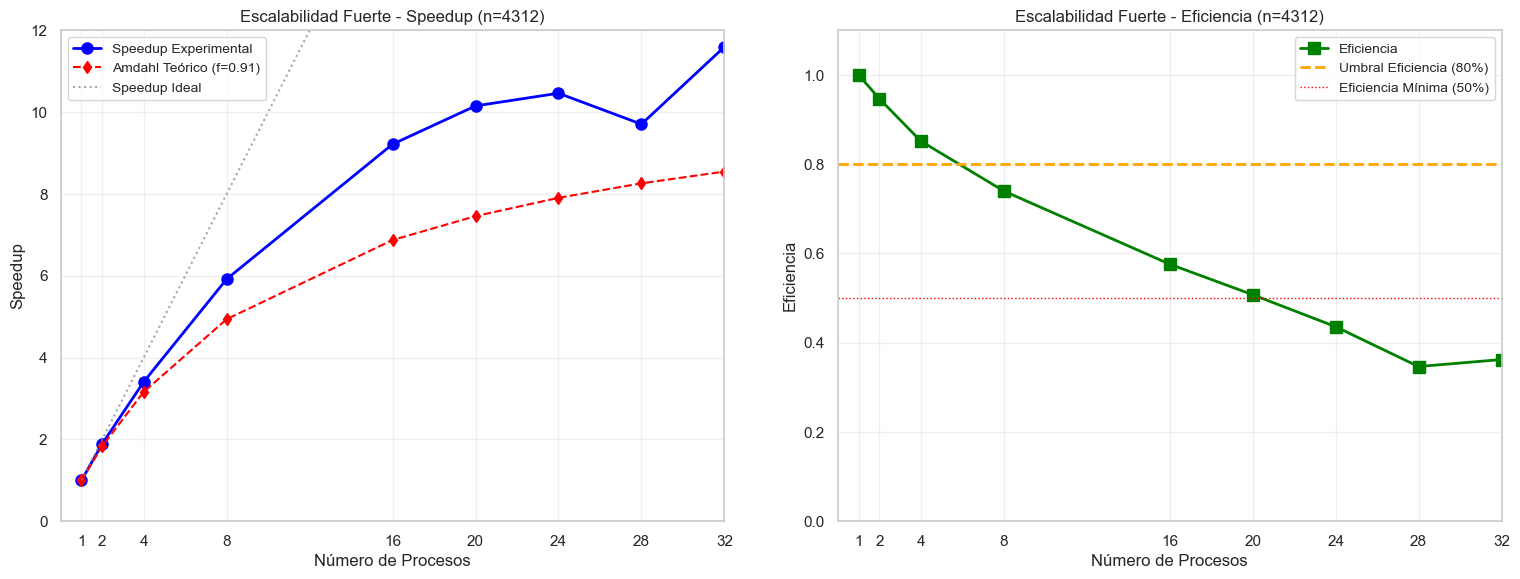


=== RESUMEN STRONG SCALING (n=4312) ===
Speedup máximo: 11.60x (con 32 procesos)
Eficiencia con 24 procesos: 0.436
Tiempo secuencial (1 proceso): 20.718s
Tiempo con 24 procesos: 1.980s
Accuracy promedio: 0.9962 ± nan


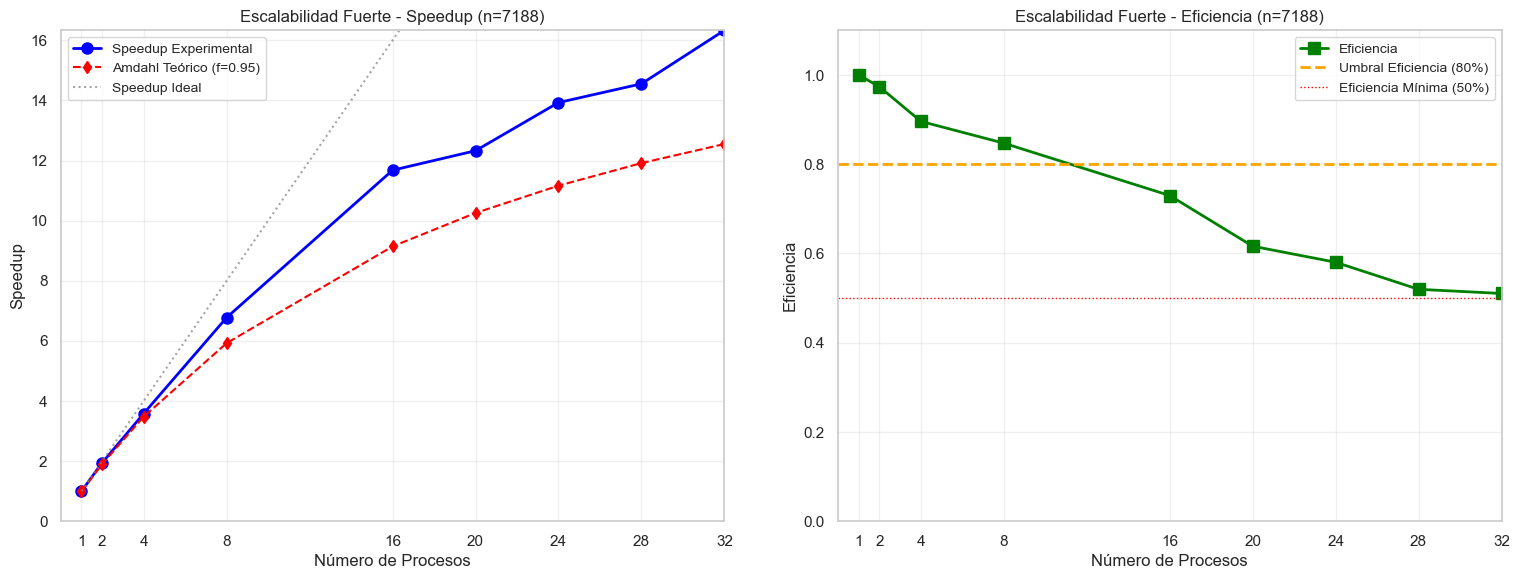


=== RESUMEN STRONG SCALING (n=7188) ===
Speedup máximo: 16.33x (con 32 procesos)
Eficiencia con 24 procesos: 0.580
Tiempo secuencial (1 proceso): 58.814s
Tiempo con 24 procesos: 4.222s
Accuracy promedio: 0.9995 ± nan


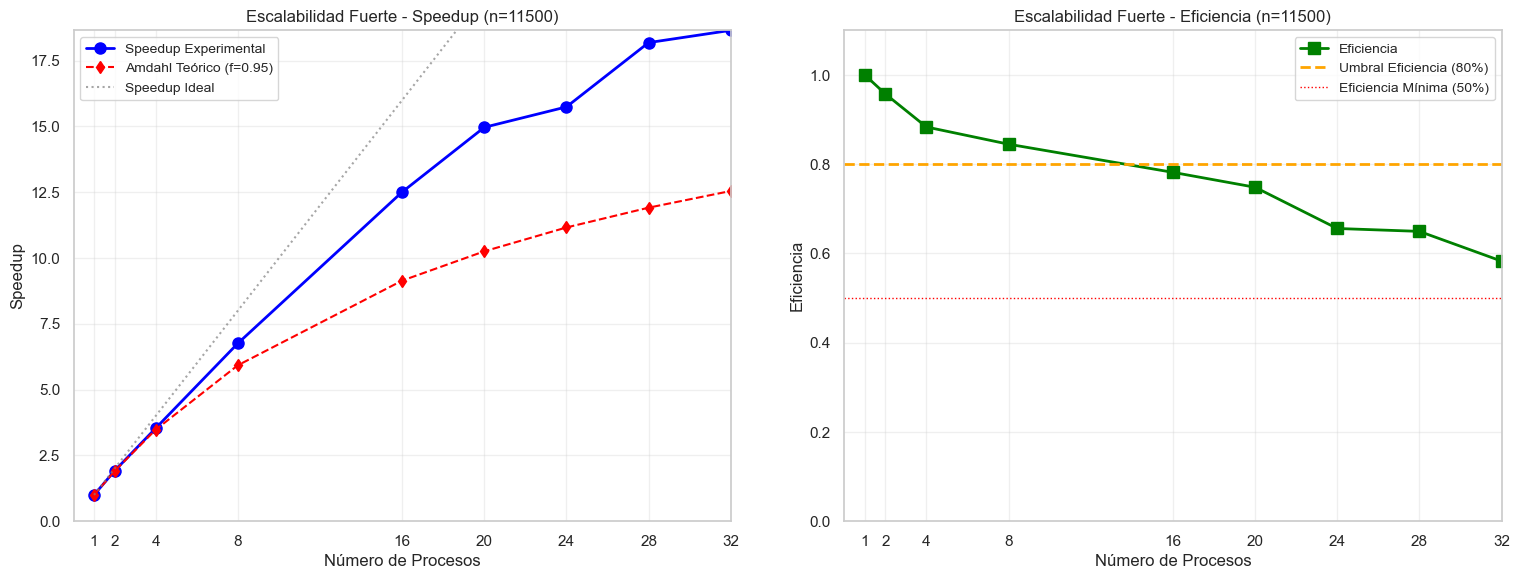


=== RESUMEN STRONG SCALING (n=11500) ===
Speedup máximo: 18.65x (con 32 procesos)
Eficiencia con 24 procesos: 0.656
Tiempo secuencial (1 proceso): 156.588s
Tiempo con 24 procesos: 9.946s
Accuracy promedio: 1.0000 ± nan


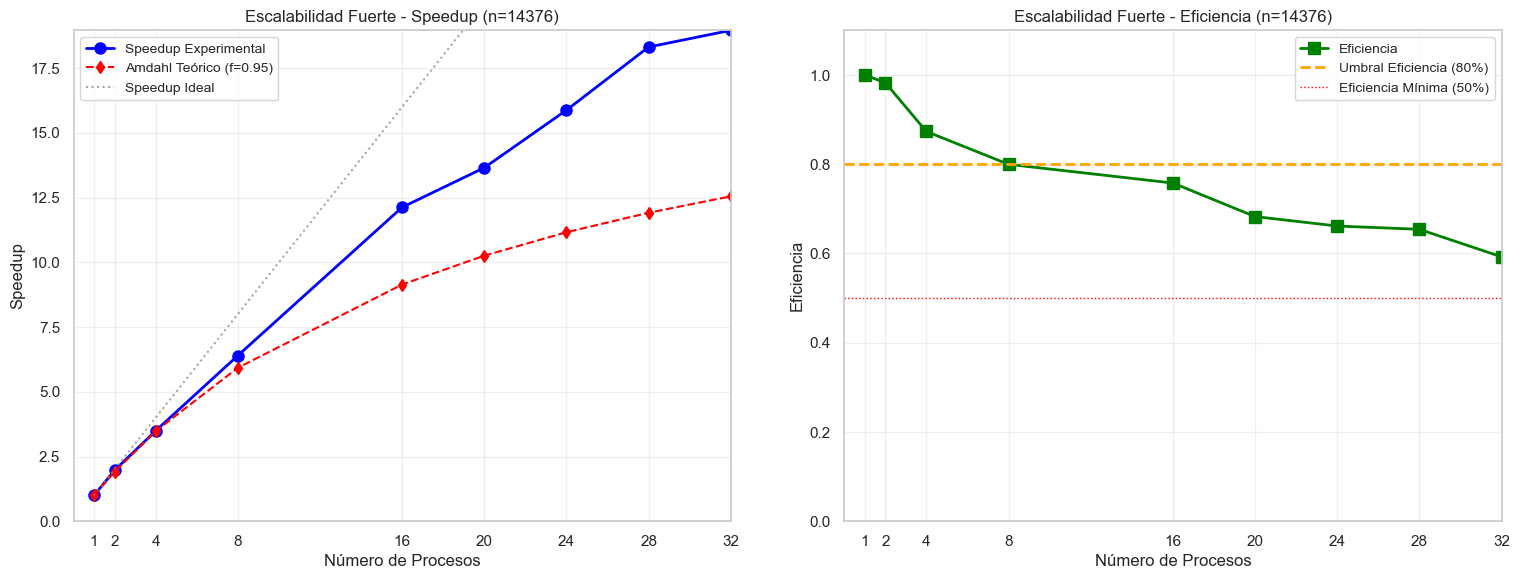


=== RESUMEN STRONG SCALING (n=14376) ===
Speedup máximo: 18.96x (con 32 procesos)
Eficiencia con 24 procesos: 0.662
Tiempo secuencial (1 proceso): 242.468s
Tiempo con 24 procesos: 15.272s
Accuracy promedio: 1.0000 ± nan


In [181]:
plot_strong_scaling(df, n_value=1437)
plot_strong_scaling(df, n_value=2875)
plot_strong_scaling(df, n_value=4312)
plot_strong_scaling(df, n_value=7188)
plot_strong_scaling(df, n_value=11500)
plot_strong_scaling(df, n_value=14376)

- Con base a lo observado, podemos demostrar que se logra recién obtener una eficiencia mínima del 50% a partir de los 7000 datos. Sin embargo para cantidades menores, no se alcanza la eficiencia mínima deseada. 

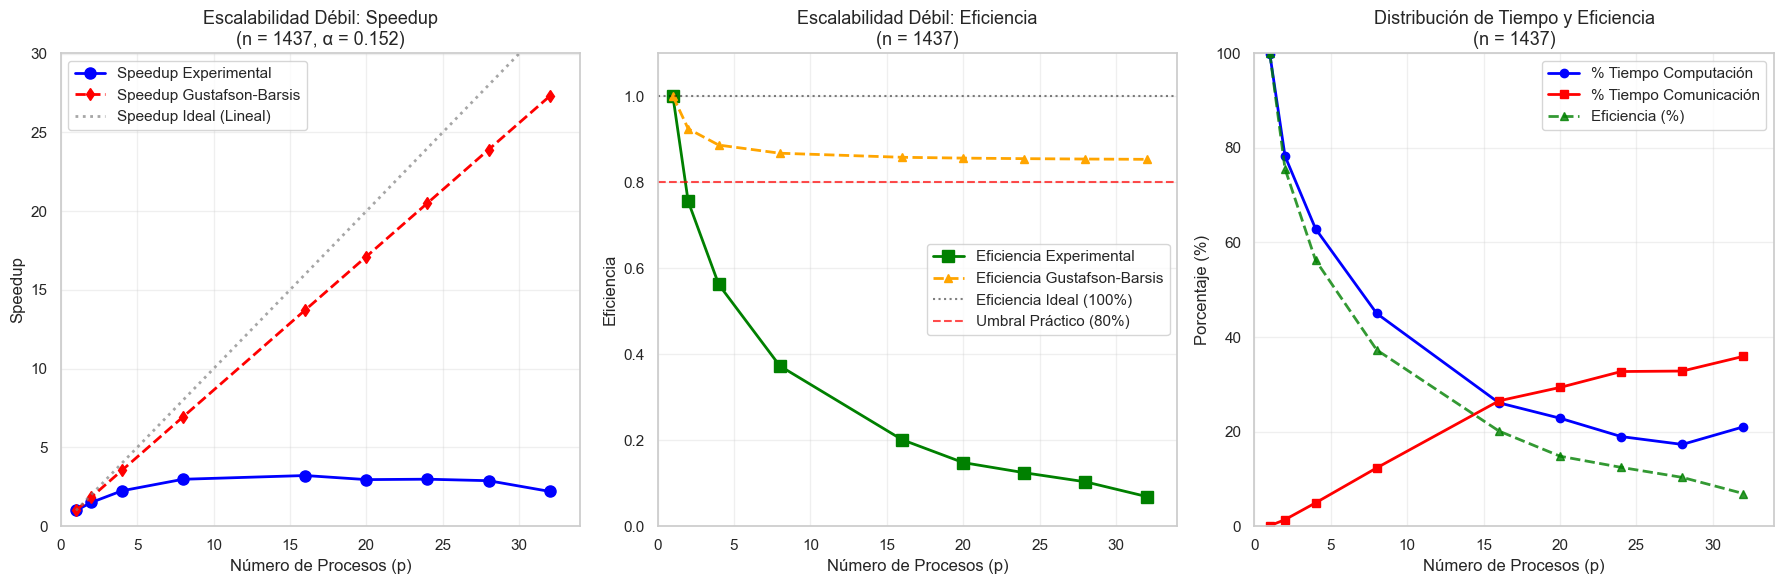


ANÁLISIS DE ESCALABILIDAD DÉBIL - n = 1437
Tiempo secuencial (T₁): 2.3307 segundos
Fracción secuencial (α): 0.1517
Trabajo por proceso: 1437 elementos por proceso base

Proc  T_total  Speedup  S_Gust   Efic_Exp  Efic_Gust Comp%  Comm%  Accuracy
--------------------------------------------------------------------------------
1     2.3307   1.00     1.00     1.000     1.000     99.9   0.1    0.9874  
2     1.5426   1.51     1.85     0.755     0.924     78.2   1.4    0.9874  
4     1.0365   2.25     3.55     0.562     0.886     62.9   4.9    0.9870  
8     0.7817   2.98     6.94     0.373     0.867     45.0   12.3   0.9879  
16    0.7239   3.22     13.73    0.201     0.858     26.1   26.5   0.9896  
20    0.7873   2.96     17.12    0.148     0.856     22.8   29.3   0.9868  
24    0.7805   2.99     20.51    0.124     0.855     19.0   32.7   0.9886  
28    0.8061   2.89     23.91    0.103     0.854     17.3   32.8   0.9870  
32    1.0545   2.21     27.30    0.069     0.853     21.0   35.9 

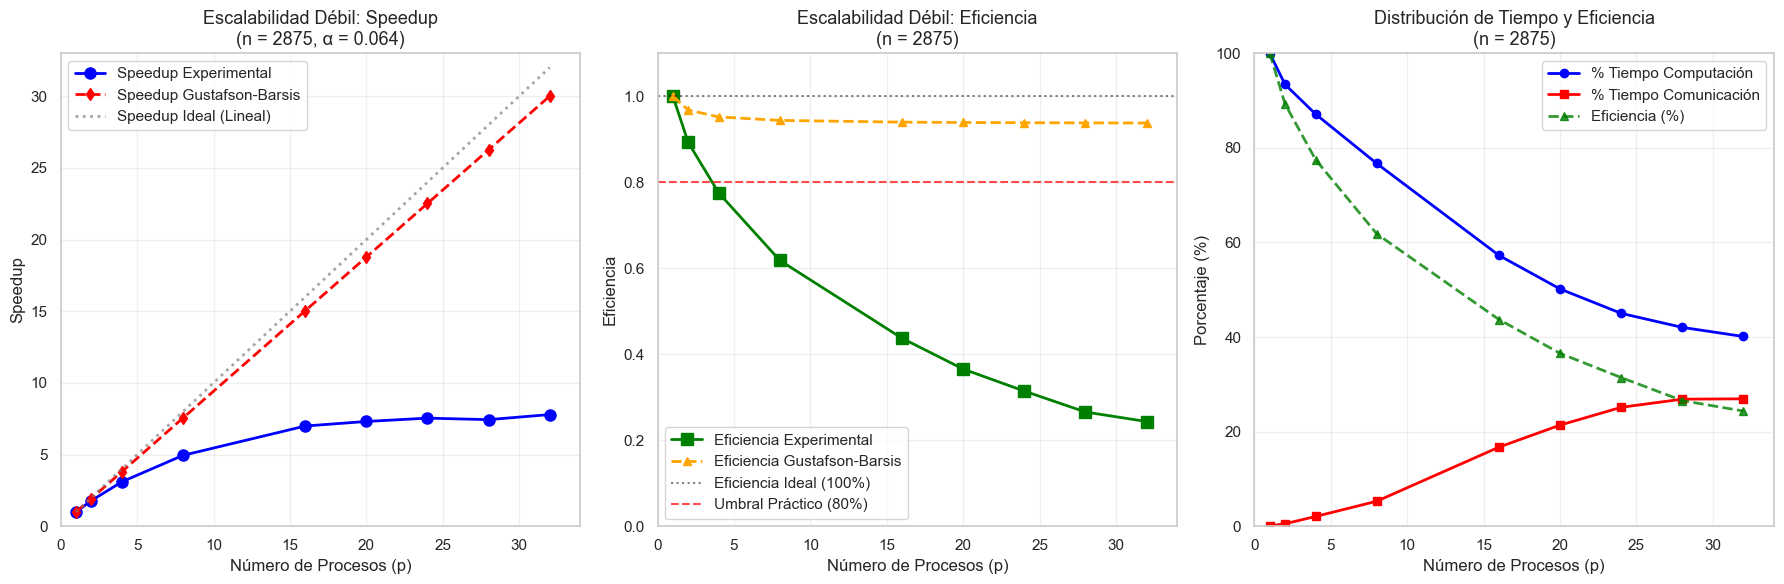


ANÁLISIS DE ESCALABILIDAD DÉBIL - n = 2875
Tiempo secuencial (T₁): 9.2289 segundos
Fracción secuencial (α): 0.0645
Trabajo por proceso: 2875 elementos por proceso base

Proc  T_total  Speedup  S_Gust   Efic_Exp  Efic_Gust Comp%  Comm%  Accuracy
--------------------------------------------------------------------------------
1     9.2289   1.00     1.00     1.000     1.000     100.0  0.0    0.9884  
2     5.1700   1.79     1.94     0.893     0.968     93.4   0.5    0.9872  
4     2.9775   3.10     3.81     0.775     0.952     87.1   2.1    0.9874  
8     1.8665   4.94     7.55     0.618     0.944     76.7   5.3    0.9883  
16    1.3200   6.99     15.03    0.437     0.940     57.3   16.7   0.9904  
20    1.2626   7.31     18.78    0.365     0.939     50.2   21.4   0.9899  
24    1.2237   7.54     22.52    0.314     0.938     45.0   25.1   0.9913  
28    1.2411   7.44     26.26    0.266     0.938     42.0   26.9   0.9907  
32    1.1845   7.79     30.00    0.243     0.938     40.1   26.9 

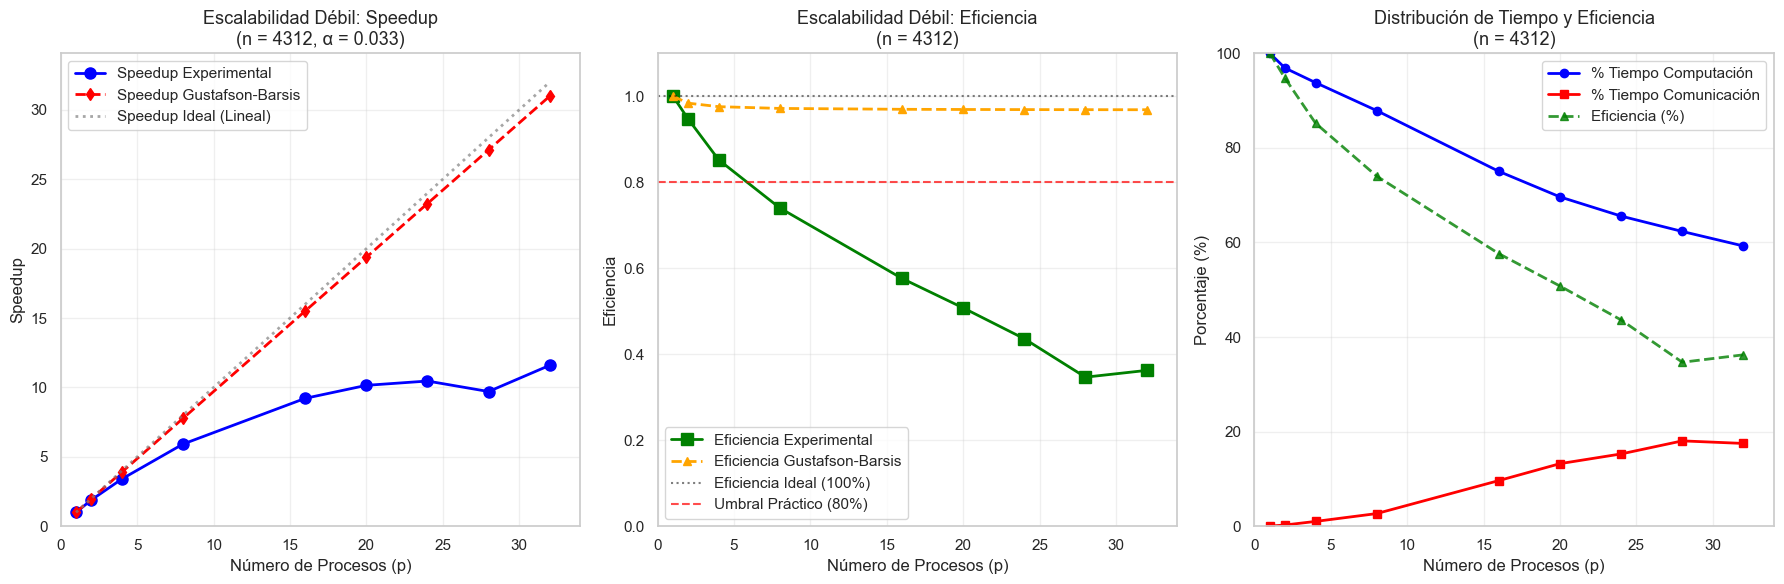


ANÁLISIS DE ESCALABILIDAD DÉBIL - n = 4312
Tiempo secuencial (T₁): 20.7184 segundos
Fracción secuencial (α): 0.0326
Trabajo por proceso: 4312 elementos por proceso base

Proc  T_total  Speedup  S_Gust   Efic_Exp  Efic_Gust Comp%  Comm%  Accuracy
--------------------------------------------------------------------------------
1     20.7184  1.00     1.00     1.000     1.000     100.0  0.0    0.9954  
2     10.9413  1.89     1.97     0.947     0.984     96.8   0.3    0.9962  
4     6.0806   3.41     3.90     0.852     0.976     93.8   1.0    0.9966  
8     3.4999   5.92     7.77     0.740     0.971     87.9   2.7    0.9965  
16    2.2480   9.22     15.51    0.576     0.969     75.0   9.7    0.9961  
20    2.0407   10.15    19.38    0.508     0.969     69.6   13.2   0.9956  
24    1.9803   10.46    23.25    0.436     0.969     65.6   15.3   0.9965  
28    2.1346   9.71     27.12    0.347     0.969     62.3   18.0   0.9963  
32    1.7868   11.60    30.99    0.362     0.968     59.2   17.5

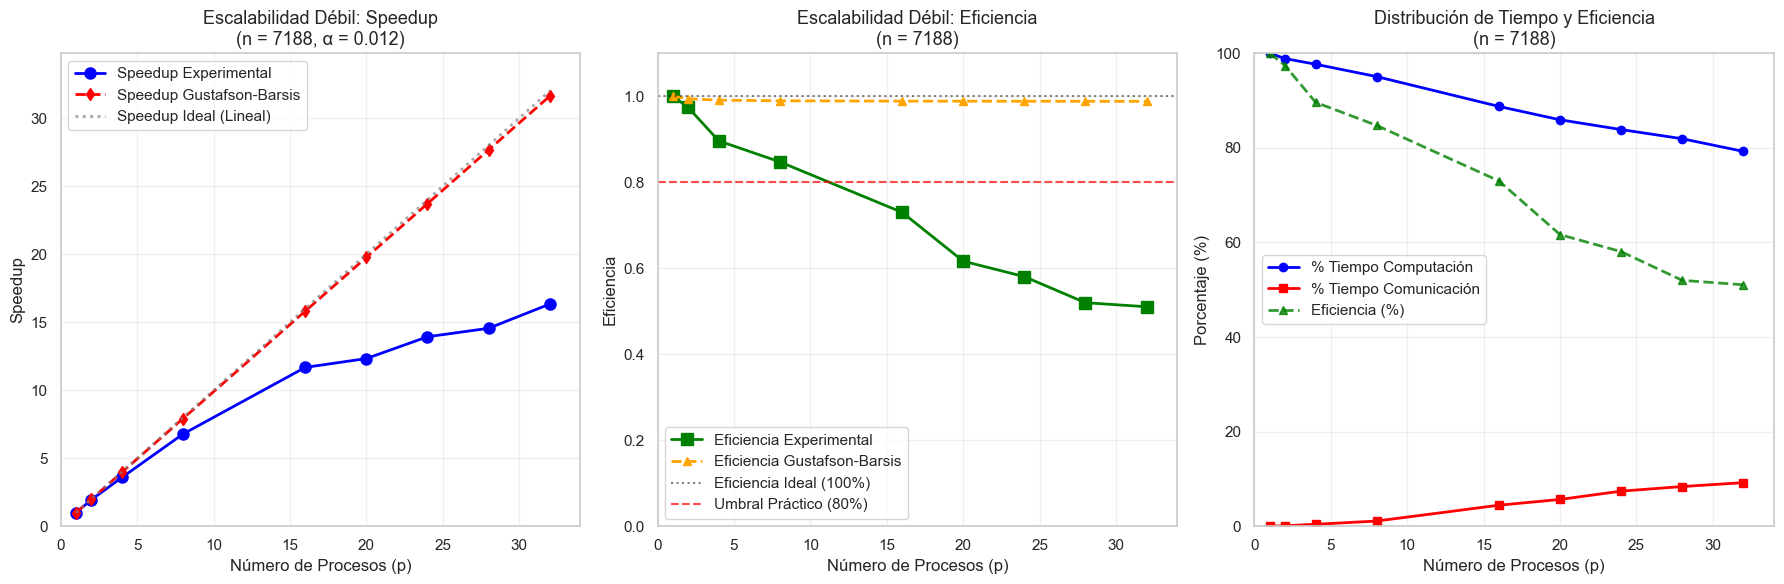


ANÁLISIS DE ESCALABILIDAD DÉBIL - n = 7188
Tiempo secuencial (T₁): 58.8138 segundos
Fracción secuencial (α): 0.0124
Trabajo por proceso: 7188 elementos por proceso base

Proc  T_total  Speedup  S_Gust   Efic_Exp  Efic_Gust Comp%  Comm%  Accuracy
--------------------------------------------------------------------------------
1     58.8138  1.00     1.00     1.000     1.000     100.0  0.0    1.0000  
2     30.2007  1.95     1.99     0.974     0.994     98.8   0.1    0.9997  
4     16.4096  3.58     3.96     0.896     0.991     97.7   0.4    0.9989  
8     8.6779   6.78     7.91     0.847     0.989     95.0   1.1    0.9998  
16    5.0364   11.68    15.81    0.730     0.988     88.7   4.4    0.9991  
20    4.7714   12.33    19.76    0.616     0.988     85.9   5.7    0.9996  
24    4.2224   13.93    23.71    0.580     0.988     83.8   7.4    0.9992  
28    4.0415   14.55    27.67    0.520     0.988     81.9   8.4    0.9993  
32    3.6012   16.33    31.62    0.510     0.988     79.2   9.2 

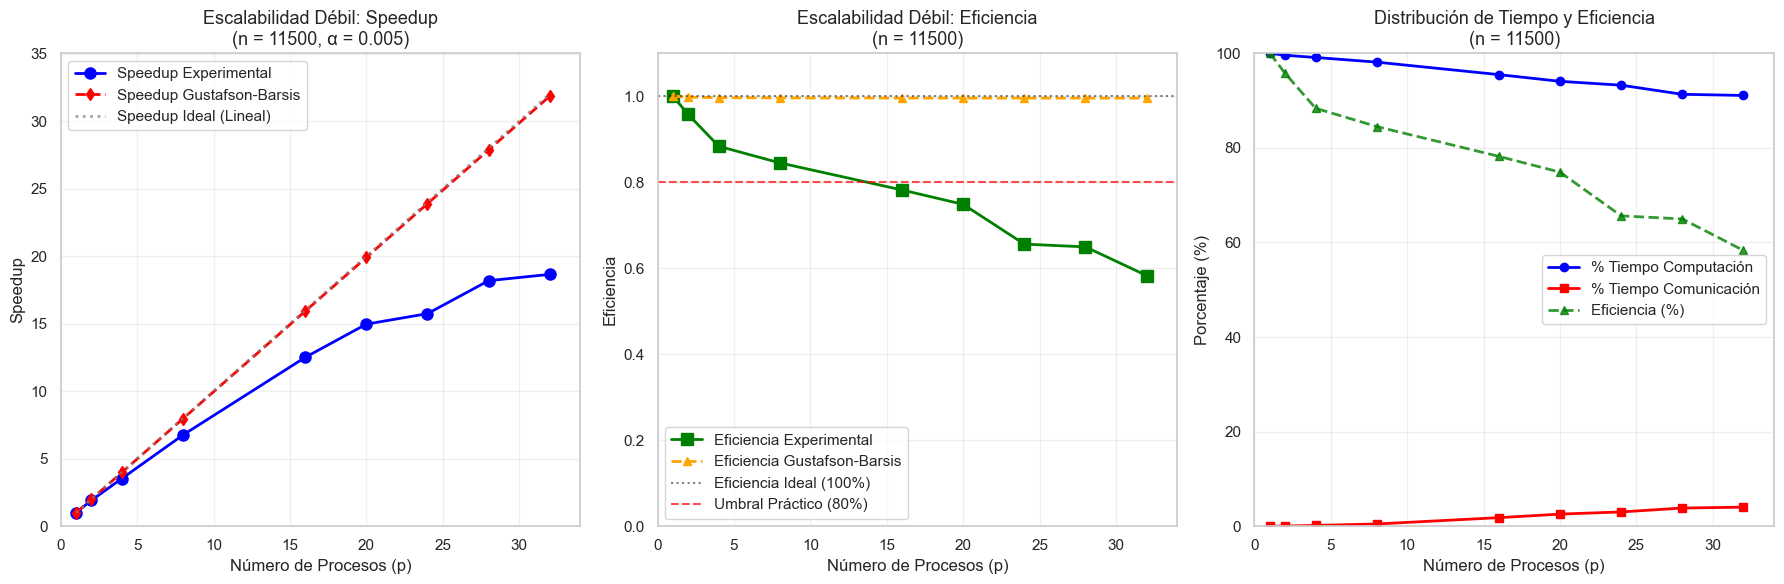


ANÁLISIS DE ESCALABILIDAD DÉBIL - n = 11500
Tiempo secuencial (T₁): 156.5878 segundos
Fracción secuencial (α): 0.0048
Trabajo por proceso: 11500 elementos por proceso base

Proc  T_total  Speedup  S_Gust   Efic_Exp  Efic_Gust Comp%  Comm%  Accuracy
--------------------------------------------------------------------------------
1     156.5878 1.00     1.00     1.000     1.000     100.0  0.0    1.0000  
2     81.7670  1.92     2.00     0.958     0.998     99.5   0.0    1.0000  
4     44.3115  3.53     3.99     0.883     0.996     99.1   0.2    1.0000  
8     23.1680  6.76     7.97     0.845     0.996     98.1   0.5    1.0000  
16    12.5182  12.51    15.93    0.782     0.996     95.5   1.8    1.0000  
20    10.4617  14.97    19.91    0.748     0.995     94.0   2.6    1.0000  
24    9.9457   15.74    23.89    0.656     0.995     93.2   3.0    1.0000  
28    8.6100   18.19    27.87    0.650     0.995     91.3   3.8    1.0000  
32    8.3946   18.65    31.85    0.583     0.995     91.1   4

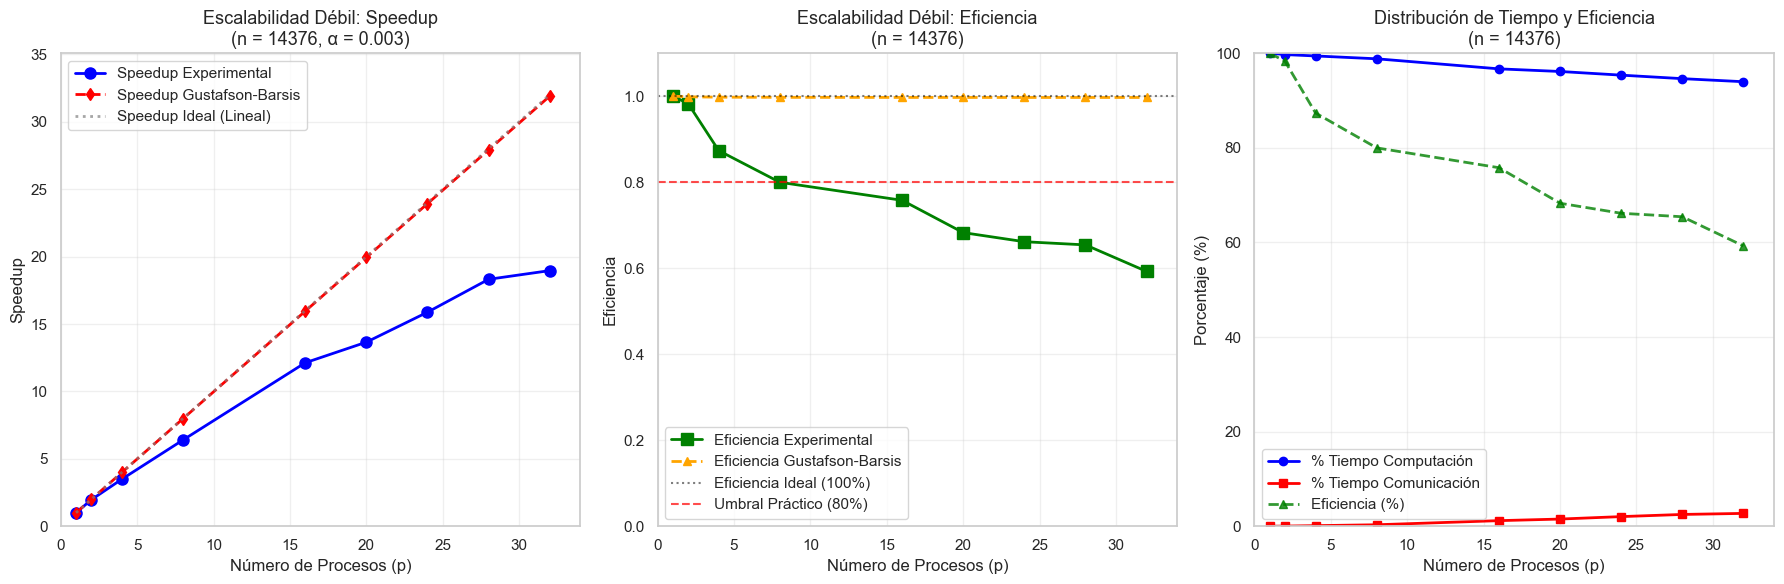


ANÁLISIS DE ESCALABILIDAD DÉBIL - n = 14376
Tiempo secuencial (T₁): 242.4685 segundos
Fracción secuencial (α): 0.0032
Trabajo por proceso: 14376 elementos por proceso base

Proc  T_total  Speedup  S_Gust   Efic_Exp  Efic_Gust Comp%  Comm%  Accuracy
--------------------------------------------------------------------------------
1     242.4685 1.00     1.00     1.000     1.000     100.0  0.0    1.0000  
2     123.3796 1.97     2.00     0.983     0.998     99.7   0.0    1.0000  
4     69.4084  3.49     3.99     0.873     0.998     99.4   0.1    1.0000  
8     37.8980  6.40     7.98     0.800     0.997     98.8   0.3    1.0000  
16    19.9969  12.13    15.95    0.758     0.997     96.7   1.2    1.0000  
20    17.7579  13.65    19.94    0.683     0.997     96.1   1.5    1.0000  
24    15.2720  15.88    23.93    0.662     0.997     95.3   2.0    1.0000  
28    13.2378  18.32    27.91    0.654     0.997     94.6   2.5    1.0000  
32    12.7880  18.96    31.90    0.593     0.997     94.0   2

In [112]:
plot_weak_scaling(df, n_value=1437)
plot_weak_scaling(df, n_value=2875)
plot_weak_scaling(df, n_value=4312)
plot_weak_scaling(df, n_value=7188)
plot_weak_scaling(df, n_value=11500)
plot_weak_scaling(df, n_value=14376)

- Con base a lo observado, a pesar de que se esta obteniendo un buen speedup a medida que se incrementan la cantidad de datos y recursos, la eficiencia sigue decreciendo a medida que se incrementan los números de proceso, eso se debe al overhead de comunicación. Resaltando que a partir del incremento de la cantidad de datos (>7000) sea optimo paralizar el algoritmo KNN. 

In [ ]:
# 6. Haga un análisis del cambio posible en la precisión obtenida (accuracy)
# mientras el algoritmo escala con n y p. De encontrar un cambio, describa cuál sería su causa
def plot_accuracy_vs_processes(df):
    if df.empty:
        print("DataFrame vacío")
        return None, None
    
    # Obtener valores únicos de n
    n_values = sorted(df['n'].unique())
    print(f"Valores de n encontrados: {n_values}")
    
    # Calcular estadísticas agrupadas por n y procesos
    stats_df = df.groupby(['n', 'p']).agg({
        'accuracy': ['mean', 'std', 'count']
    }).reset_index()
    
    # Aplanar nombres de columnas
    stats_df.columns = ['n', 'p', 'accuracy_mean', 'accuracy_std', 'accuracy_count']
    
    # Crear la figura
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Configurar colores y estilos para cada n
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    markers = ['o', 's', '^', 'D', 'v']
    
    # Graficar cada valor de n
    for i, n_val in enumerate(n_values):
        n_data = stats_df[stats_df['n'] == n_val].copy()
        n_data = n_data.sort_values('p')
        
        if not n_data.empty:
            # Graficar con barras de error si hay desviación estándar
            ax.errorbar(n_data['p'], n_data['accuracy_mean'],
                       yerr=n_data['accuracy_std'],
                       marker=markers[i % len(markers)], 
                       color=colors[i % len(colors)],
                       label=f'n = {n_val}',
                       linewidth=2.5,
                       markersize=8,
                       capsize=5,
                       capthick=2)
            
            # Añadir valores de accuracy en cada punto
            for _, row in n_data.iterrows():
                ax.annotate(f'{row["accuracy_mean"]:.3f}', 
                           (row['p'], row['accuracy_mean']), 
                           textcoords="offset points", 
                           xytext=(0, 15), 
                           ha='center', 
                           fontsize=9,
                           bbox=dict(boxstyle="round,pad=0.2", 
                                   facecolor=colors[i % len(colors)], 
                                   alpha=0.3))
    
    # Configurar el gráfico
    ax.set_xlabel('Número de Procesos', fontsize=14, fontweight='bold')
    ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
    ax.set_title('Accuracy vs Número de Procesos por Tamaño de Dataset', 
                fontsize=16, fontweight='bold', pad=20)
    
    # Configurar grid
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Configurar ejes
    procesos_values = sorted(df['p'].unique())
    ax.set_xlim(left=0, right=max(procesos_values) + 1)
    ax.set_ylim(bottom=max(0, df['accuracy'].min() - 0.05), 
               top=min(1.05, df['accuracy'].max() + 0.05))
    
    # Configurar ticks del eje x
    ax.set_xticks(procesos_values)
    
    # Añadir leyenda
    ax.legend(fontsize=12, loc='best', framealpha=0.9)
    
    # Mejorar apariencia
    plt.tight_layout()
    
    # Mostrar estadísticas resumidas
    print("\n=== RESUMEN ACCURACY POR DATASET ===")
    for n_val in n_values:
        n_stats = stats_df[stats_df['n'] == n_val]
        if not n_stats.empty:
            print(f"\nn = {n_val}:")
            print(f"  Accuracy promedio: {n_stats['accuracy_mean'].mean():.4f}")
            print(f"  Accuracy máxima: {n_stats['accuracy_mean'].max():.4f} (con {n_stats.loc[n_stats['accuracy_mean'].idxmax(), 'p']} procesos)")
            print(f"  Accuracy mínima: {n_stats['accuracy_mean'].min():.4f} (con {n_stats.loc[n_stats['accuracy_mean'].idxmin(), 'p']} procesos)")
            
            # Verificar estabilidad del accuracy
            accuracy_std_total = n_stats['accuracy_mean'].std()
            if accuracy_std_total < 0.01:
                print(f"  ✓ Accuracy estable (desv. std: {accuracy_std_total:.4f})")
            else:
                print(f"  ⚠ Accuracy variable (desv. std: {accuracy_std_total:.4f})")
    
    plt.show()
    return fig, ax


Valores de n encontrados: [1437, 2875, 4312, 7188, 11500, 14376]

=== RESUMEN ACCURACY POR DATASET ===

n = 1437:
  Accuracy promedio: 0.9876
  Accuracy máxima: 0.9896 (con 16 procesos)
  Accuracy mínima: 0.9867 (con 32 procesos)
  ✓ Accuracy estable (desv. std: 0.0010)

n = 2875:
  Accuracy promedio: 0.9889
  Accuracy máxima: 0.9913 (con 24 procesos)
  Accuracy mínima: 0.9865 (con 32 procesos)
  ✓ Accuracy estable (desv. std: 0.0017)

n = 4312:
  Accuracy promedio: 0.9962
  Accuracy máxima: 0.9969 (con 32 procesos)
  Accuracy mínima: 0.9954 (con 1 procesos)
  ✓ Accuracy estable (desv. std: 0.0005)

n = 7188:
  Accuracy promedio: 0.9995
  Accuracy máxima: 1.0000 (con 1 procesos)
  Accuracy mínima: 0.9989 (con 4 procesos)
  ✓ Accuracy estable (desv. std: 0.0004)

n = 11500:
  Accuracy promedio: 1.0000
  Accuracy máxima: 1.0000 (con 1 procesos)
  Accuracy mínima: 1.0000 (con 1 procesos)
  ✓ Accuracy estable (desv. std: 0.0000)

n = 14376:
  Accuracy promedio: 1.0000
  Accuracy máxima: 1.

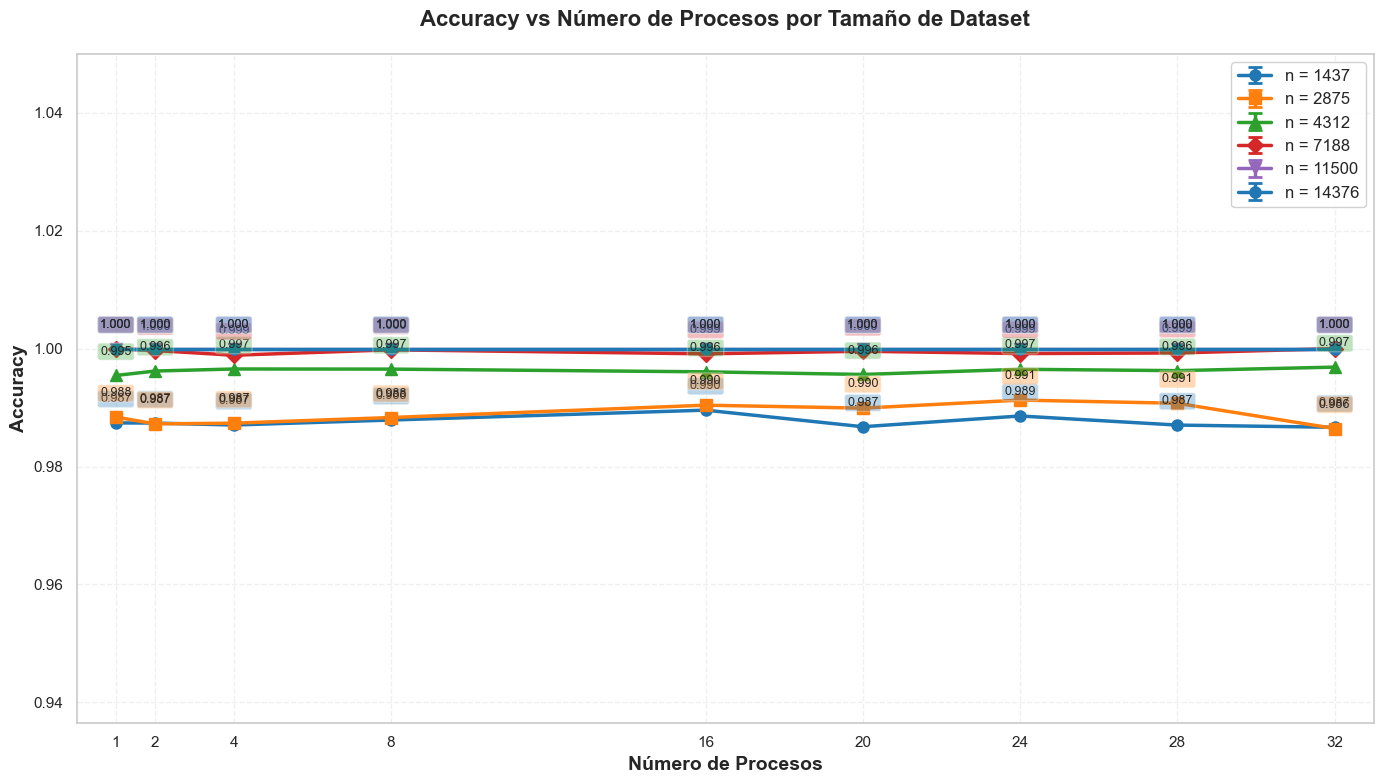

(<Figure size 1400x800 with 1 Axes>,
 <Axes: title={'center': 'Accuracy vs Número de Procesos por Tamaño de Dataset'}, xlabel='Número de Procesos', ylabel='Accuracy'>)

In [16]:
plot_accuracy_vs_processes(df)

¿Depende la precisión obtenida (accuracy) del cambio en p? 

- No depende, en la gráfica podemos observar que el accuracy se mantiene (o varie muy levemente, en milésimas), debido a que debe ser constante independientemente al número de procesos.